# Проект №5 - Сборный проект №1

# Сборный проект по определению факторов успеха игр 

#### Описание проекта

Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Не важно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

#### План проекта:
1. Открыть файл с данными и изучить общую информацию:
    * __Путь к файлу__:/datasets/games.csv
    
    
2. Подготовка данных к анализу:
    1. Проверить и заменить названия столбцов;
    2. Преобразовать данные в нужные типы.
    3. Обработать пропуски, дубликаты. Обратить внимание на аббревиатуру 'tbd.
    4. Описать причины, которые могли привести к пропускам;
    5. Посчитать суммарные продажи во всех регионах и запишите их в отдельный столбец.
    
    
3. Проведите исследовательский анализ данных:
    1. Какое количество игр выпускалось в разные годы?
    2. Исследовать продажи по платформам. ЖЦ платформ.
    3. Оценка возможности построения прогноза на 2017.
    4. Выбрать несколько потенциально прибыльных платформ.
    5. Построить график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Сравнить продажи по платформам.
    6. Исследовать влияние на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    7. Соотнести выводы с продажами игр на других платформах.
    8. Распределение игр по жанрам, самые прибыльные жанры.
    
    
4. Составить портрет пользователя каждого региона (NA, EU, JP):
    1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
    2. Самые популярные жанры (топ-5). Поясните разницу.
    3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
    
    
5. Проверить статистические гипотезы:
    1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
    2. Средние пользовательские рейтинги жанров Action и Sports разные.
    
    
6. Сделать общий вывод


# Задача
- выявить определяющие успешность игры закономерности. 

In [1]:
#классика жанра- импорт библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
from scipy import stats as st
#Настройка отображения рамера графиков
rcParams['figure.figsize'] = 18, 8

# 1. Общий анализ
##### Шаг 1. Откройте файл с данными и изучите общую информацию

In [2]:
games_table = pd.read_csv('/datasets/games.csv')

#Создадим словарь для хранения таблиц и их изменений
games_table_v0 = games_table.copy()
backup = pd.DataFrame(columns = ['версия', 'необходимость', 'название', 'комментарий'])
backup.loc[0] = ['v0', 'исходный файл', 'games_table_v0', 'выгрузка']

#общая информация о таблице
print(games_table.info())
games_table.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None


,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


#### Описание данных
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы долларов)
* EU_sales — продажи в Европе (миллионы долларов)
* JP_sales — продажи в Японии (миллионы долларов)
* Other_sales — продажи в других странах (миллионы долларов)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

In [3]:
#проверим состояние бэкАп таблицы
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка


##### Проблемы:
1. Корректировка типов:
    1. *year_or_release - некорректный тип, должен быть целочисленный;*
    2. *user_score - некорректный тип, должен быть с плавающей точкой.*
2. Разнорегистровое наименование столбцов

In [4]:
games_table.tail()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.0,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.0,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.0,NaN,NaN,NaN
16714,Winning Post 8 2016,PSV,2016.0,Simulation,0.00,0.00,0.01,0.0,NaN,NaN,NaN


## Вывод
Первичный анализ выполнен, обнаружены проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые наименования, для корректной работы требуется привести столбцы к int32, float32 - типам, а наименования трансформировать в нижний регистр. 

Как данные собирались из открытых источников не понятно и есть предположения, что в открытых ресурсах либо присутствовали не все данные и при попытке автоматичесго сбора поля заполнились пустыми значениями, второй вариант сбощик не смог считать нужный признак. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA.


---
## 2. Подготовка данных к анализу
##### Шаг 2. Подготовьте данные
1. Замените названия столбцов (приведите к нижнему регистру);
2. Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
3. Обработайте пропуски при необходимости:
4. Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
5. Опишите причины, которые могли привести к пропускам;
6. Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
7. Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

### 2.1. Корретировка регистра в наименовании столбцов

In [5]:
%%time
#Приведение наименования столбцов к нижнему регистру
def lower_column(table):
    '''
    Вход: table - входная таблица типа dataframe, с первой строкой наименований
    Описание: функция понижает регистр наименований в Dataframe и создает словарь,
    в котором хранится новое и исходное наименование.
    '''
    lower_column = []
    old_and_new_column = {}
    for i in table.columns:
        lower_column.append(i.lower())
        old_and_new_column[i] = i.lower()
    table.columns = lower_column
    return table, old_and_new_column

lower_column(games_table)
    
#Построим график "Ящик с усами" для числовых атрибутов, для первоначального знакомства с данными
sns.set(style='darkgrid') #подключим стили sns
def all_box():
    (games_table
     .loc[:,'genre':'rating']
     .boxplot(figsize=(15,8))
     .set(title = 'Превью картина распределения по числовым показателям',\
          xlabel = 'Показатели',\
          ylabel = 'Числовые значения')\
    );

#fig_1 = all_box()
#fig_1

#Рассмотрим 5 произвольных строк
games_table.sample(5)

CPU times: user 4 ms, sys: 0 ns, total: 4 ms
Wall time: 31.4 ms


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
10916,Uta no Prince-Sama: Debut,PSP,2012.0,Adventure,0.00,0.00,0.09,0.00,NaN,NaN,NaN
10899,Beaterator,PSP,2009.0,Misc,0.06,0.02,0.00,0.02,80.0,7.8,E
13711,B.L.U.E.: Legend of Water,PS,NaN,Adventure,0.00,0.00,0.04,0.00,NaN,NaN,NaN
1137,Kinectimals,X360,2010.0,Simulation,1.02,0.46,0.00,0.13,74.0,3.1,E
2761,Midnight Club 3: DUB Edition,XB,2005.0,Racing,0.61,0.10,0.00,0.03,84.0,7.4,E10+


### 2.2./2.3. Корректировка типов данных и замена пропусков
Рассмотрим значение year_of_release на графике

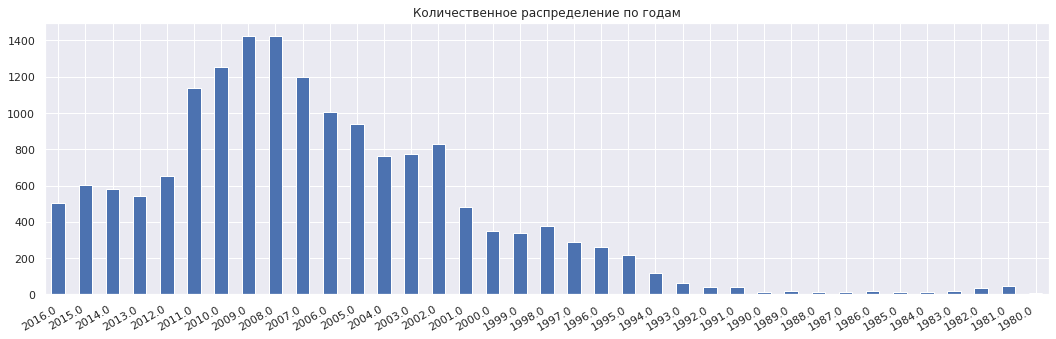

In [6]:
sns.set()
(games_table['year_of_release']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение по годам')
);
plt.xticks(rotation=30, horizontalalignment='right');

Сделаем корректировку типа данных и уберем пропуски путем их замены на ноль

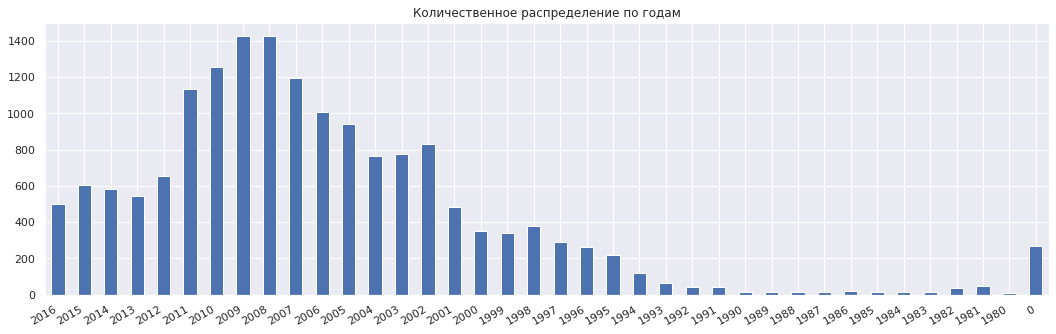

In [7]:
#Если есть Nan занчения, то заменим их на 0, для того чтобы скорректировать тип данных
games_table['year_of_release'] = games_table['year_of_release'].fillna(0).astype('int32')

#БэкАп с учетом корректировки типа и заполнения нулями пропусков
games_table_v1 = games_table.copy()
backup.loc[1] = ['v1','смена типа(int32) и заполнение(nan на 0)','games_table_v1','модификация - year_of_release']

#Визуальная проверка
def count_on_year():
    sns.set()
    (games_table['year_of_release']
     .value_counts()
     .sort_index(ascending=False)
     .plot(kind='bar' ,figsize=(18,5))
     .set(title='Количественное распределение по годам')
    );
    plt.xticks(rotation=30, horizontalalignment='right');
    
fig_2 = count_on_year()
fig_2

Кооректировка и замена выполненны, что отчетливо видно по появившемуся "столбу" со значением ноль и количество таких записей порядка 300.

---

Следующим столбцом будет users_score, рассмотрим уникальные значения данного признака на графике и распределение оценок

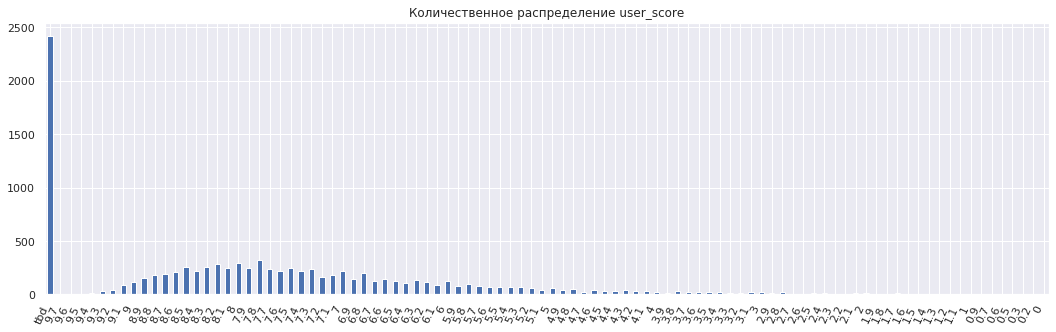

In [8]:
sns.set()
(games_table['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

Пик находится на tbd, рассмотрим распределение оценок без учёта tbd:

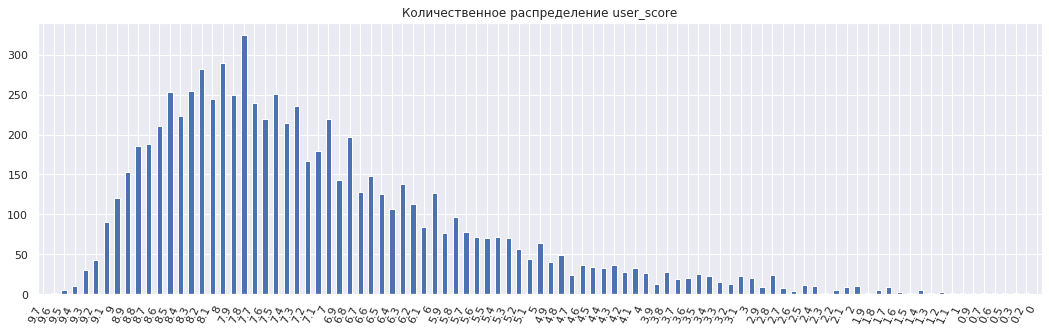

In [9]:
(games_table[games_table['user_score'] != 'tbd']['user_score']
 .value_counts()
 .sort_index(ascending=False)
 .plot(kind='bar' ,figsize=(18,5))
 .set(title='Количественное распределение user_score')
);
plt.xticks(rotation=65, horizontalalignment='right');

распределение оценок напоминает - __нормальное распределение__ со положительным "хвостом"

In [10]:
games_table['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Имеется Nan и значение tbd. Где tbd - абревиатура для ещё не вышедших игр, проверим гипотезу:

Количетво годов в которых есть tbd -  20


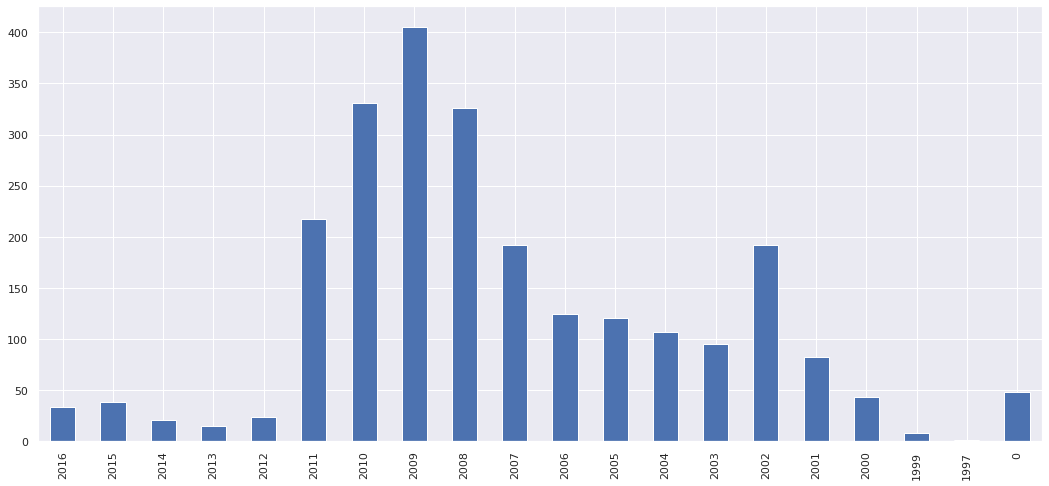

In [11]:
print(\
      'Количетво годов в которых есть tbd - ',\
      len(games_table[games_table['user_score'] == 'tbd']['year_of_release'].unique())\
     )
(games_table[games_table['user_score'] == 'tbd']['year_of_release']
 .value_counts().sort_index(ascending=False)
 .plot(kind='bar')\
);

Данная гипотеза не подтвердилась, т.к. такое значение было бы только на последнии годы.

Согласно анализу сайта metacritic.com, данный рейтинг означает, что рейтинг просто отсутствует. Проверим у скольких игр рейтинг 0. 

In [12]:
games_table[games_table['user_score'] == '0']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
2835,My Little Pony: Pinkie Pie's Party,DS,2008,Adventure,0.66,0.0,0.0,0.06,NaN,0,E


Сделаем замену tbd и Nan на ноль, значаит ноль, как рейтинг будет означать нет оценки или не проставлена оценка.
Но перед этим рассмотрим предварительную корреляцтионную карту

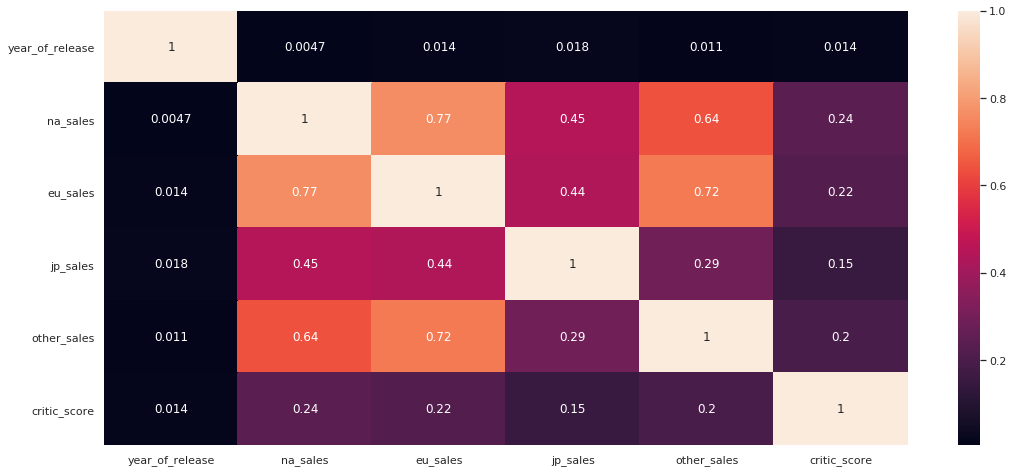

In [13]:
a = games_table.corr()
sns.heatmap(a, annot=True);

In [14]:
#очистка данных от tbd и nan
games_table.loc[games_table['user_score'] == 'tbd', 'user_score'] = 0
games_table['user_score'].fillna('0', inplace=True)

#перевод в тип float
games_table['user_score'] = pd.to_numeric(games_table['user_score'], errors='raise')
games_table['user_score'].describe()

count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

<font color='red'> *Вероятнее всего от нулевых значений нужно будет избавляться путем удаления данных строк из анализа, иначе они помешают проанализировать данные, НО требуется дополнительный анализ*</font>

---

Рассмотрим другие столбцы с пропусками

In [15]:
print('пропуски')
games_table.isnull().sum()

пропуски


name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score            0
rating             6766
dtype: int64

Нужно убрать пропуски в столбцах: имя, жанр

In [16]:
#очистка данных от tbd и nan
games_table.loc[games_table['user_score'] == 'tbd', 'user_score'] = 0
games_table['user_score'].fillna('0', inplace=True)

#перевод в тип float
games_table['user_score'] = pd.to_numeric(games_table['user_score'], errors='raise')
games_table['user_score'].describe()

/opt/conda/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


count    16715.000000
mean         3.235363
std          3.688755
min          0.000000
25%          0.000000
50%          0.000000
75%          7.300000
max          9.700000
Name: user_score, dtype: float64

проверим присутствие дублей:

In [17]:
print('количество дублей ', games_table.duplicated().sum())

for i in games_table.columns:
    if games_table[i].duplicated().sum() > 0:
        print('|{: >15} | {: >10}|'. format(i, games_table[i].duplicated().sum()))
    else:
        'good'

количество дублей  0
|           name |       5155|
|       platform |      16684|
|year_of_release |      16677|
|          genre |      16702|
|       na_sales |      16313|
|       eu_sales |      16408|
|       jp_sales |      16471|
|    other_sales |      16560|
|   critic_score |      16632|
|     user_score |      16620|
|         rating |      16706|


Дубликаты в рейтингах - это нормально, а вот дубликаты в наименовании -СТРАНОСТЬ, вероятнее всего это дубли записей. Сделаем проверку:

In [18]:
games_dubl = games_table.name.duplicated()
table = pd.merge(games_table, games_dubl, left_index=True, right_index=True, how='inner')
table.head()

,name_x,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,name_y
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,False
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,0.0,NaN,False
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,False
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,False
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,0.0,NaN,False


In [19]:
games_table['revenue'] = games_table['na_sales']+games_table['eu_sales']+games_table['jp_sales']+games_table['other_sales']

In [20]:
temp_pivot_games = games_table\
.pivot_table(index=['name', 'genre', 'year_of_release'], values=['platform'], aggfunc='count')\
.sort_values(by='platform', ascending=False)

temp_pivot_games[temp_pivot_games['platform'] > 1].head()

,,,platform
name,genre,year_of_release,
Ratatouille,Action,2007,9
LEGO Marvel Super Heroes,Action,2013,9
FIFA 14,Sports,2013,9
LEGO The Hobbit,Action,2014,8
Angry Birds Star Wars,Strategy,2013,8


Рассмотрим игру, которая повторяется 9 раз:

In [21]:
games_table.loc[games_table['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,NaN,0.0,NaN,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,0.0,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,0.0,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,NaN,7.9,E,0.02


Дубли в наименовании обоснованы тем, что представляют разные реализации одной игры для разных платформ, что несёт за собой для каждой платформы свои уникальные показатели. Нужно проверить отсутствие дублей в игровых показателях рейтинга  и платформах.

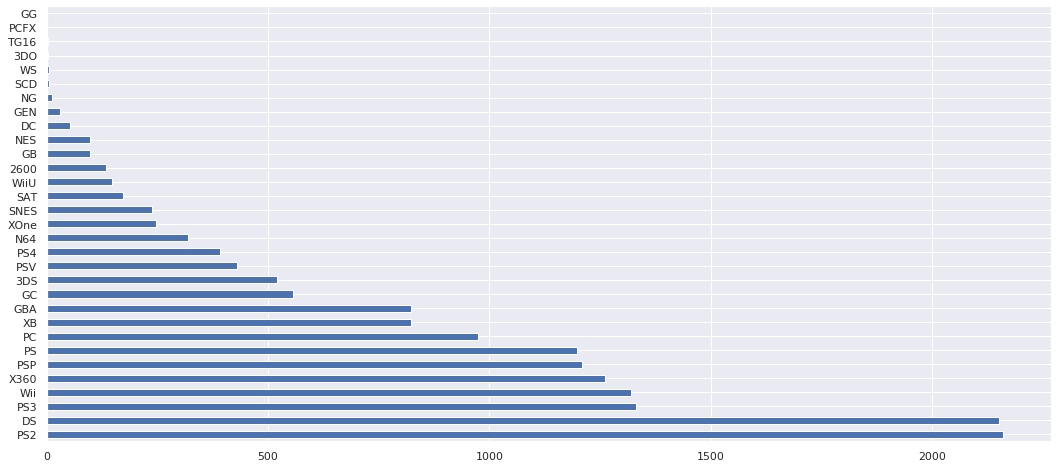

In [22]:
games_table['platform'].value_counts().plot(kind='barh');

проблем не обнаружено в платформах.

---

Столбец rating содержит данные рейтинга ESRB. Рейтинги ESRB дейтвительны в США и Канаде, и большинство игровых издателей с уважением относятся к этой организации. Помимо ESRB, существуют и другие рейтинговые системы оценки игр: PEGI в Европе, CERO в Японии, а так же в Австралии (отличается своей непродуманностью и недружелюбием). Значит данный рейтинг только для США и Канады, а в нашей таблице данных больше и с другой локацией, поэтому пропуски - это нормально, заменим их на TBD. 

Столбец critic_store содержит оценку критиков в стабальной шкале оценок, если пропуск то заменить лучше на 0, что будет означать, что критики нет для данной игры.

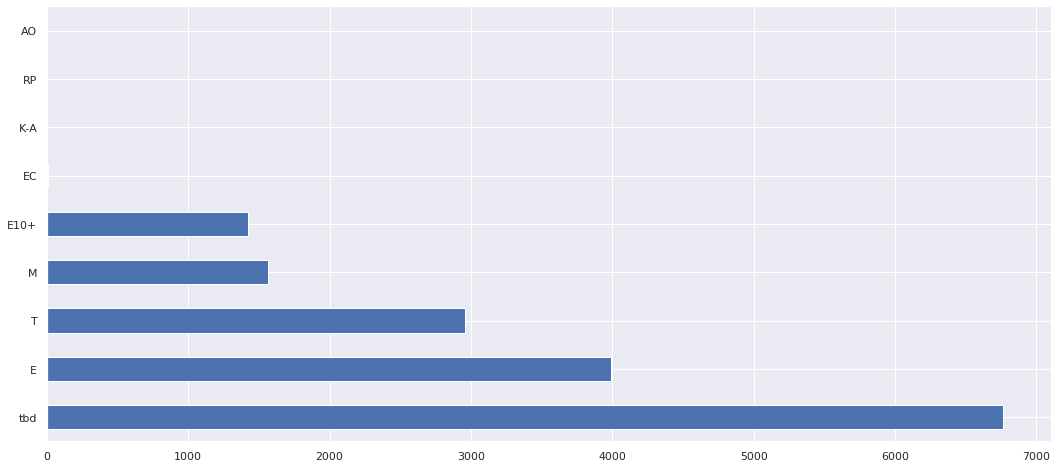

In [23]:
#так как столбец рейтинг ESRB категориальный, то лучшей заменой будет проставнока игровой константы - tbd
games_table['rating'].fillna('tbd', inplace=True)
games_table['critic_score'].fillna(0, inplace=True)

#games_table.loc[games_table['rating'] == 'None', 'rating'] = 'tbd'
games_table['rating'].value_counts().plot(kind='barh');

In [24]:
games_table.loc[games_table['name'] == 'Ratatouille']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
1598,Ratatouille,DS,2007,Action,0.49,0.62,0.0,0.14,0.0,0.0,tbd,1.25
2442,Ratatouille,PS2,2007,Action,0.31,0.00,0.0,0.53,65.0,8.0,E,0.84
3069,Ratatouille,PSP,2007,Action,0.22,0.27,0.0,0.16,64.0,7.1,E,0.65
3902,Ratatouille,PS3,2007,Action,0.09,0.32,0.0,0.10,55.0,4.8,E,0.51
3948,Ratatouille,Wii,2007,Action,0.43,0.03,0.0,0.04,62.0,6.7,E,0.50
6398,Ratatouille,X360,2007,Action,0.23,0.02,0.0,0.02,56.0,0.0,E,0.27
7681,Ratatouille,GBA,2007,Action,0.14,0.05,0.0,0.00,65.0,0.0,E,0.19
9015,Ratatouille,GC,2007,Action,0.11,0.03,0.0,0.00,60.0,5.6,E,0.14
14514,Ratatouille,PC,2007,Action,0.01,0.01,0.0,0.00,0.0,7.9,E,0.02


Выявим строки с пропуском в жанре для анализа

In [25]:
games_table['genre'].fillna('ggg', inplace=True)
games_table[games_table['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
659,NaN,GEN,1993,ggg,1.78,0.53,0.00,0.08,0.0,0.0,tbd,2.39
14244,NaN,GEN,1993,ggg,0.00,0.00,0.03,0.00,0.0,0.0,tbd,0.03


пропуски в имени и жанре оказались взаимосвязаны, поэтому данные строки лучше удалить, т.к. никакой информации не несут

In [26]:
games_table = games_table.drop([659,14244])
games_table[games_table['genre'] == 'ggg']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue


In [27]:
print('пропуски')
print(games_table.isnull().sum())
games_table = games_table.dropna()

пропуски
name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
revenue            0
dtype: int64


In [28]:
#БэкАп с учетом корректировки типа и заполнения нулями пропусков
games_table_v2 = games_table.copy()
backup.loc[2] = ['v2','удалены пропуски, дубли','games_table_v2','0 в рейтинге - не оценен, дабавлен revenue']
print('Сумарное количесво пропусков', games_table.isnull().sum().sum())

Сумарное количесво пропусков 0


In [29]:
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"


### Вывод:
Все пропуски обработанны:
1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
2. Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных.

##### Требовалось сделать по заданию:
- [x] Замените названия столбцов (приведите к нижнему регистру);
- [x] Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему;
- [x] Обработайте пропуски при необходимости:
- [x] Объясните, почему заполнили пропуски определённым образом или почему не стали это делать;
- [x] Опишите причины, которые могли привести к пропускам;
- [x] Обратите внимание на аббревиатуру 'tbd' в столбцах с рейтингом. Отдельно разберите это значение и опишите, как его обработать;
- [x] Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

---
## Комментарий от наставника

Да, лучше работать с меньшим количеством данных хорошего качества. Пропуски обработаны индикаторными значениями , верно. Так мы просто пометили места пропусков. Главное помнить об этом и не использовать их в анализе.

---

## 3. EDA
###### Шаг 3. Проведите исследовательский анализ данных
1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы? 
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год. Не учитывайте в работе данные за предыдущие годы.
4.Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
7. Соотнесите выводы с продажами игр на других платформах.
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

Есть гипотеза, что у некоторых игр, с пропущенными годами, есть данные по годам, но по другим платформам, поэтому сделаем заполнение нулевого года данными на основании медианного года выпуска определенной игры без учёта платформы:

In [30]:
#Если среднее по годам имеет десятичный хвост, то это означает, что игра была выпущена в разные годы, 
#т.е. медианная дата выпуска будет максимально правильной датой 

temp_pivot_games = games_table\
.pivot_table(index=['name', 'genre'], values=['year_of_release'], aggfunc='mean')\
.sort_values(by='year_of_release', ascending=False)

temp_pivot_games[(temp_pivot_games['year_of_release'] % 1) != 0].head()

,,year_of_release
name,genre,
Digimon Story: Cyber Sleuth,Role-Playing,2015.500000
The Book of Unwritten Tales 2,Adventure,2015.500000
Rise of the Tomb Raider,Adventure,2015.500000
Need for Speed (2015),Racing,2015.333333
Arslan: The Warriors of Legend,Action,2015.333333


In [31]:
%%time
def temp_func(row):
    '''
    функция для обработки строки с заменой нулевого года на медианной год выпуска игры без учета платформы
    '''
    year = row['year_of_release']
    if year == 0:
        year = temp.loc[row['name'],'year_of_release']
        return year
    else:
        return row.year_of_release

#before = games_table[games_table['year_of_release'] == 0]['year_of_release'].count()
temp = games_table.pivot_table(index='name', values='year_of_release', aggfunc='max')
games_table['year_of_release'] = games_table.apply(temp_func, axis=1).astype('int64')

#games_table.plot(x = 'year_of_release', kind='bar');

CPU times: user 568 ms, sys: 4 ms, total: 572 ms
Wall time: 583 ms


Проверим как заполнились игровые пропуски, на примере:

In [32]:
#games_table = games_table.reset_index(drop=True)
games_table.loc[182:184]
games_table[games_table['name'] == 'Madden NFL 2004']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
183,Madden NFL 2004,PS2,2003,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
1881,Madden NFL 2004,XB,2003,Sports,1.02,0.02,0.00,0.05,92.0,8.3,E,1.09
3889,Madden NFL 2004,GC,2003,Sports,0.40,0.10,0.00,0.01,94.0,7.7,E,0.51
5708,Madden NFL 2004,GBA,2003,Sports,0.22,0.08,0.00,0.01,70.0,6.6,E,0.31


In [33]:
games_table[games_table['name'] == 'wwe Smackdown vs. Raw 2006']

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.0


In [34]:
print('количество игр без даты -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
games_table[games_table['year_of_release'] == 0].head()

количество игр без даты - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


Обнаружено, что у некоторых игр в наименовании есть год, что позволяет нам предзаполнить года. Обработаем оставшиеся записи с нулевыми годами:

In [35]:
year = str([x for x in range(1980,2018)])

def temp_func(row):
    yrow = row['year_of_release']
    nrow = row['name']
    if yrow == 0:
        sp_row = nrow.split(' ')
        for j in sp_row:
            if (j in year) and (len(j)==4):
                return int(j)
            else:
                return yrow
    else:
        return yrow
      
games_table['year_of_release'] = games_table.apply(temp_func, axis=1)

Проверка на искожения от функции (визуальная)

In [36]:
games_table

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.0,0.0,tbd,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.0,0.0,tbd,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.0,0.0,tbd,0.01


In [37]:
print('количество игр без даты -', temp[temp['year_of_release'] == 0]['year_of_release'].count())
games_table[games_table['year_of_release'] == 0].head()

количество игр без даты - 133


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
475,wwe Smackdown vs. Raw 2006,PS2,0,Fighting,1.57,1.02,0.0,0.41,0.0,0.0,tbd,3.00
627,Rock Band,X360,0,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T,2.47
657,Frogger's Adventures: Temple of the Frog,GBA,0,Adventure,2.15,0.18,0.0,0.07,73.0,0.0,E,2.40
805,Rock Band,Wii,0,Misc,1.33,0.56,0.0,0.20,80.0,6.3,T,2.09
1142,Rock Band,PS3,0,Misc,0.99,0.41,0.0,0.22,92.0,8.4,T,1.62


---
## Комментарий от наставника

Данный процесс лучше автоматизировать. 
> Готово

---

In [38]:
games_table[games_table['year_of_release'] == 0]['year_of_release'].count()

146

Данные по годам удалось восстановить почти у половины записей, соответственно строки, в которых отсутствует год нам для анализа не нужны, т.к. нет главного признака - год, что не позволяет сделать анализ в принципе.

In [39]:
#избавимся от нулевых годов
games_table = games_table[games_table['year_of_release']!=0]
games_table.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


In [40]:
games_table_v3 = games_table.copy()
backup.loc[3] = ['v3','восстановлены года','games_table_v3','файл готов к анализу']
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"
3,v3,восстановлены года,games_table_v3,файл готов к анализу


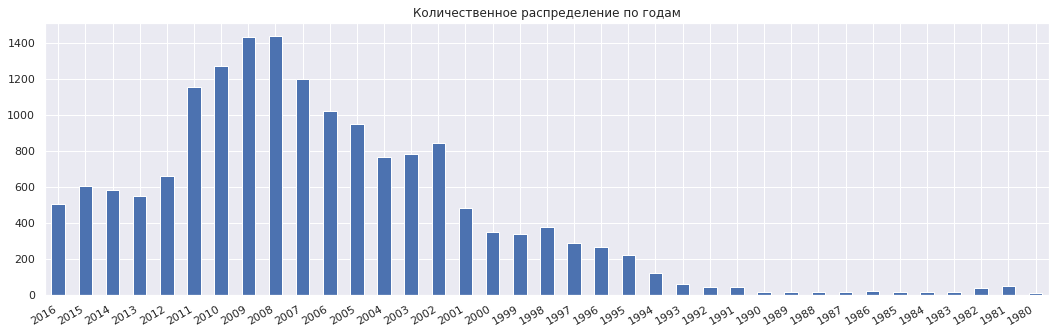

In [41]:
fig_3 = count_on_year()
fig_3

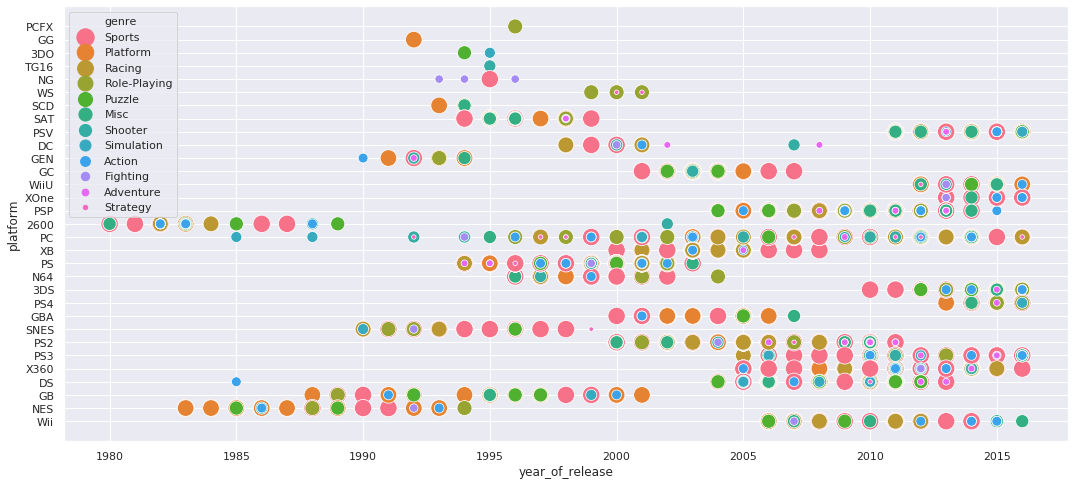

In [42]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=games_table\
                ,sizes=(20, 300));

Многие платформы устарели, например,  платформа 2600 была только до 1990, соответственно изменилось время и факторы успеха должны были измениться. Рассмотрим график с 2000 года.

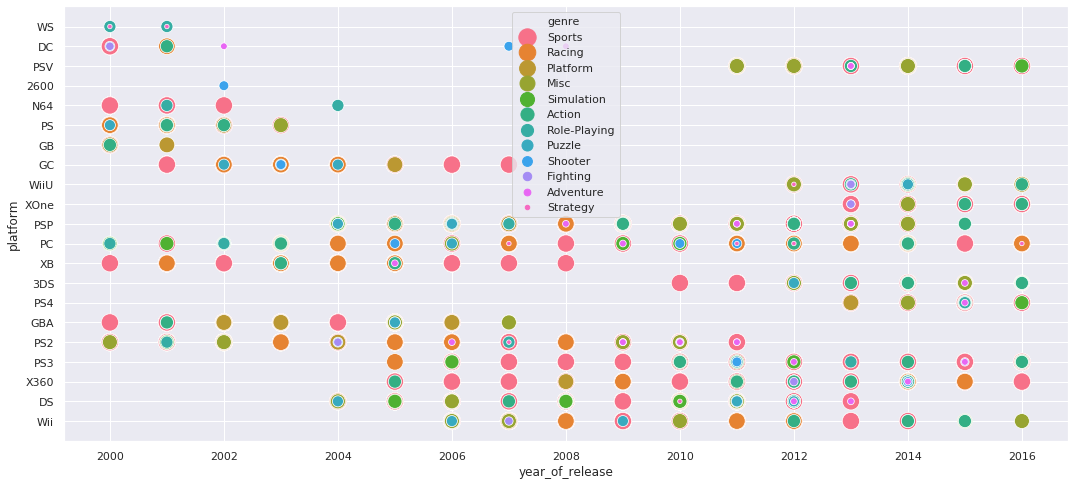

In [43]:
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="genre"\
                ,data=games_table[games_table['year_of_release'] >= 2000]\
                ,sizes=(20, 300));

##### Вывод:
Действительно многие платформы просто исчезли к 21 веку. Очень не хватает в данных столбца с игровыми новинками в технологии, т.к. с моей точки зрения любой технологический рывок провоцирует моральное устаревание продукта, а соответственно спад использования игр, и такого столбца также не хватает, т.е. второй нужный столбец для анализа количество игроков в год для игр в разрезе платформ.

##### Рассмотрим какой срок жизни у платформы

In [44]:
temp = (games_table.loc[:,['year_of_release', 'platform']]
        .drop_duplicates()
        .pivot_table(index=['platform'], values='year_of_release', aggfunc='count')
       )
temp

,year_of_release
platform,
2600,11
3DO,2
3DS,7
DC,7
DS,11
GB,13
GBA,8
GC,7
GEN,5


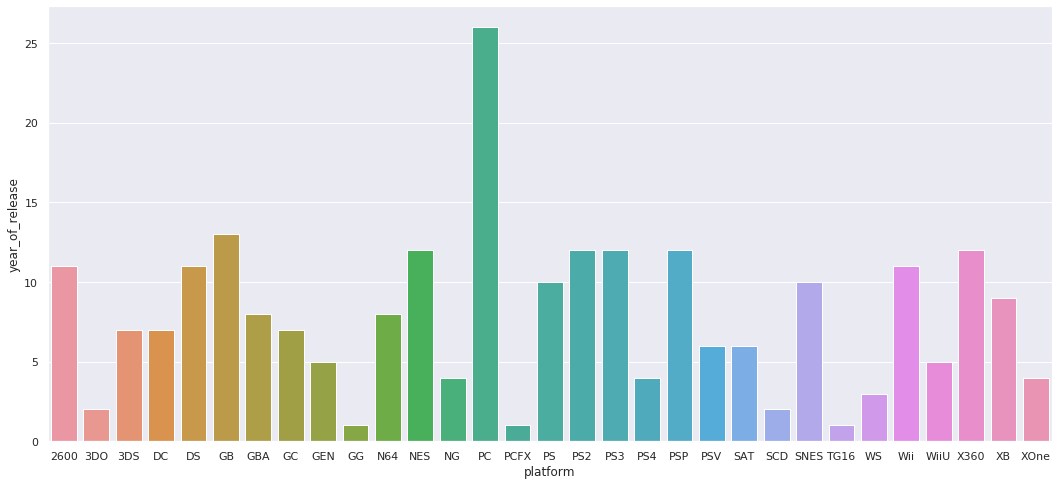

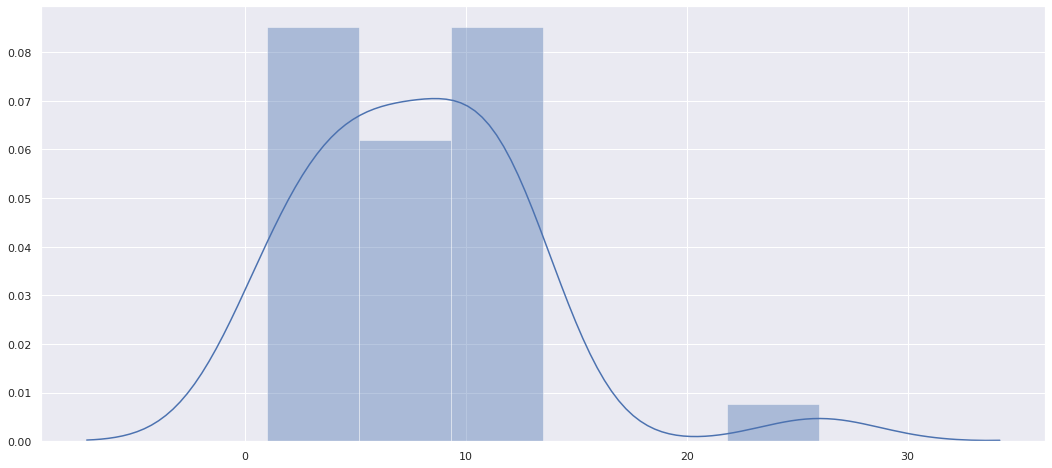

In [45]:
#fig, axis = plt.subplots(2,2, figsize=(25,7))

sns.barplot(x=temp.index, y='year_of_release', data = temp) #, ax=axis[0,0])
plt.show()
sns.distplot(temp) #, ax=axis[0,1]);
plt.show()

In [46]:
temp.year_of_release.describe() 

count    31.000000
mean      7.806452
std       5.114811
min       1.000000
25%       4.000000
50%       7.000000
75%      11.000000
max      26.000000
Name: year_of_release, dtype: float64

##### Вывод:
Средний срок жизни платформы 7 лет
>Как понять , как часто возникают новые платформы?

---
## Комментарий от наставника

Верное значение по средней продолжительности существования платформы. Здорово, что оно подкреплено расчетами. 

Мы знаем общее число платформ и число лет в данных всего. Также узнали среднюю продолжительность существования платформы. Из этих данных можно подсчитать как часто появляются платформы. Сколько штук за год, например. 

---

Следующие платформы нектуальны: WS, DC, N64,PS, GB, GC, XB, PS, PS2, DS, GBA. Рассмотрим график без данных платформ.

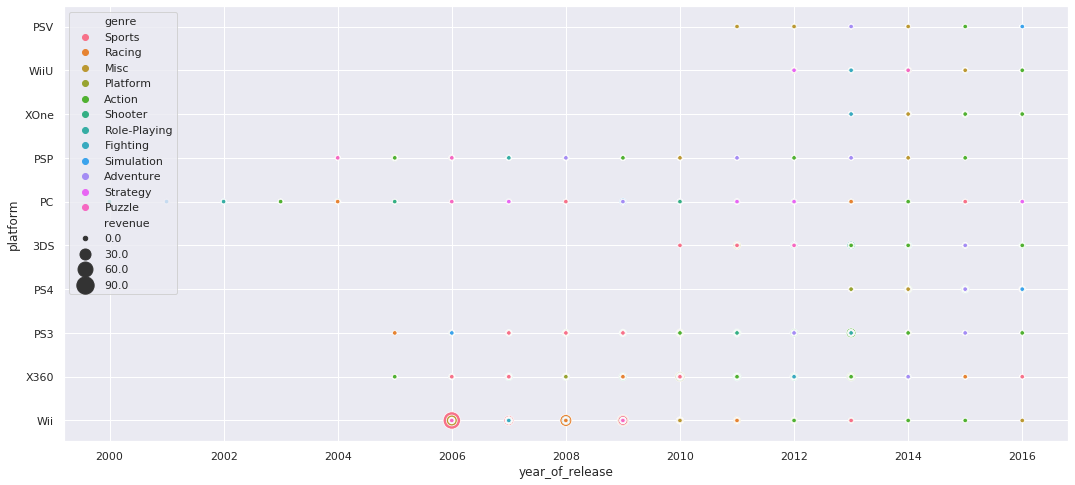

In [47]:
modern_platform = set(games_table['platform'].unique()) - \
set([ 'WS', 'DC', 'N64','PS', 'GB', 'GC', 'XB', 'PS', 'PS2', 'DS', 'GBA', '2600'])

temp_games = games_table[(games_table['year_of_release'] >= 2000)&(games_table['platform'].isin(modern_platform))]
sns.scatterplot(x="year_of_release", y="platform"\
                ,hue="genre"\
                ,size="revenue"\
                ,data=temp_games\
                ,sizes=(20, 300));

Информативность снизилась, жанры перекрывают друг друга, Но видно что в 2006 году у компании Wii была рекордная выручка по сравнению с другими платформами.

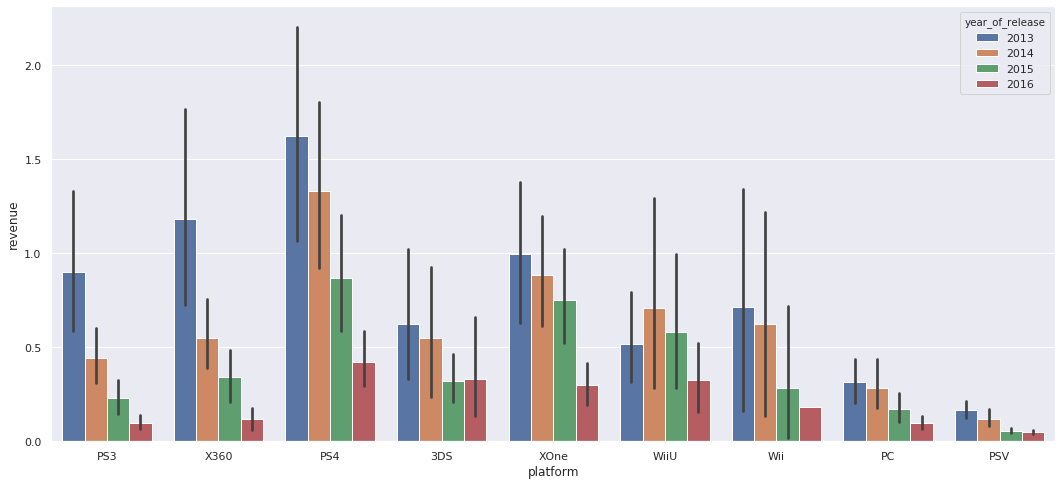

In [48]:
temp_games = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&(temp_games['platform'] != 'PSP')]
ax = sns.barplot(y='revenue', x='platform', hue='year_of_release',\
                 data = temp_games\
                )

Общий тренд всех игровых платформ - падение, т.е. ежегодное падение общей выручки в рамках всех жанров.

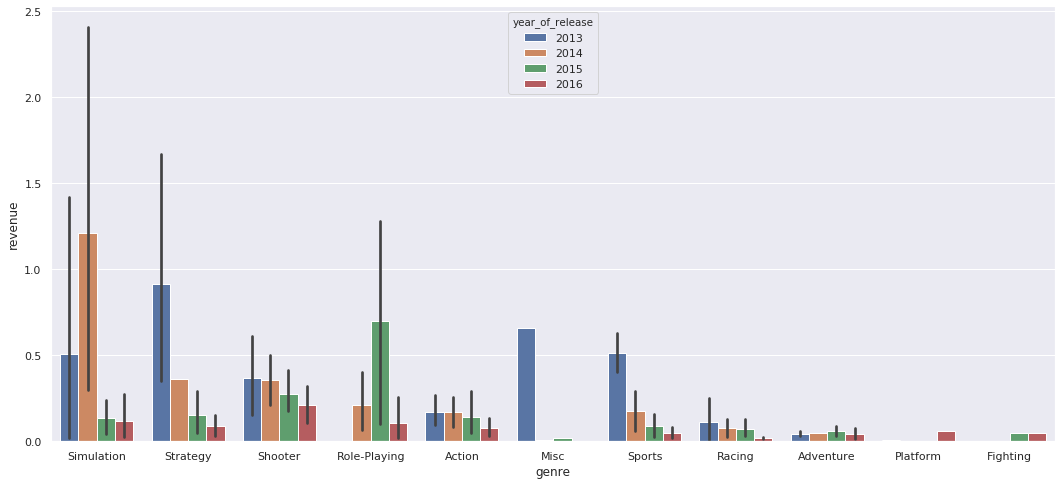

In [49]:
ax = sns.barplot(y='revenue', x='genre', hue='year_of_release',\
                 data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))&\
                                   (temp_games['platform'] == 'PC')]\
                )

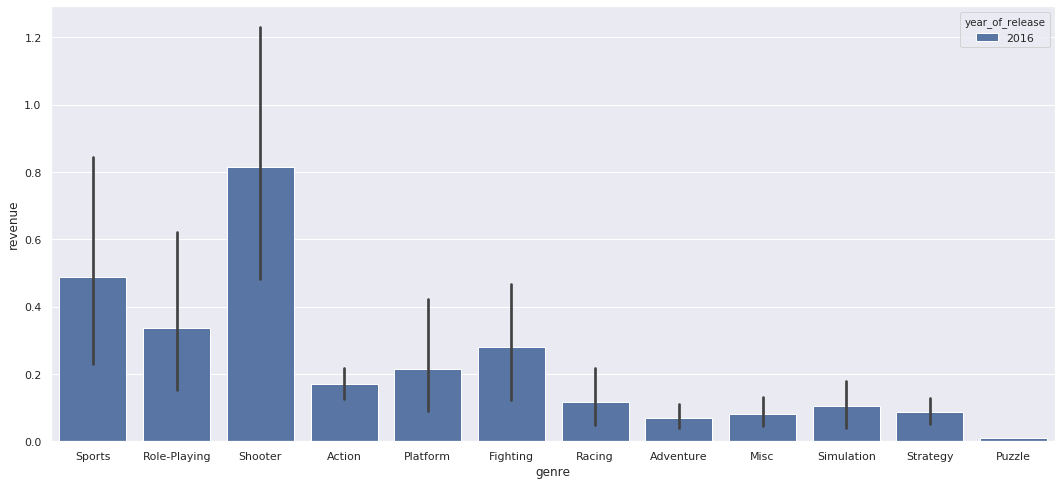

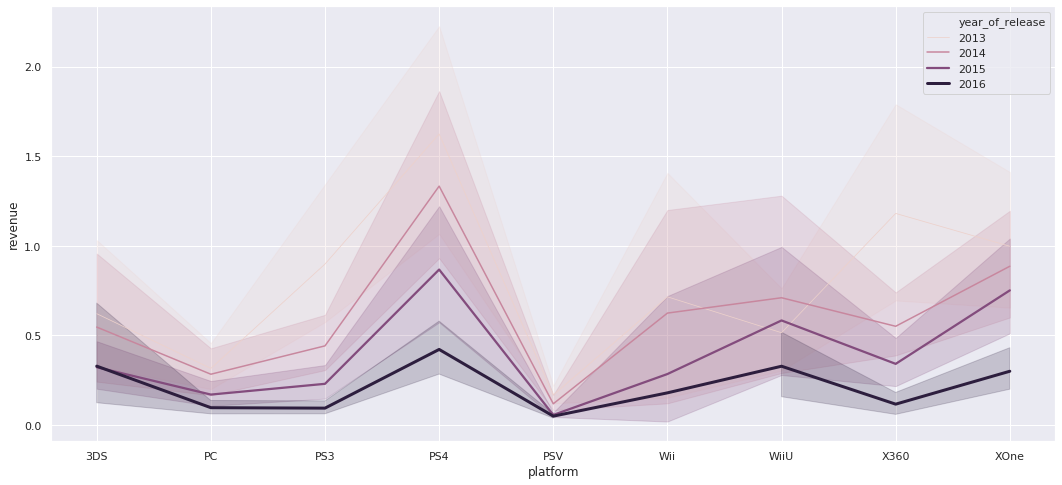

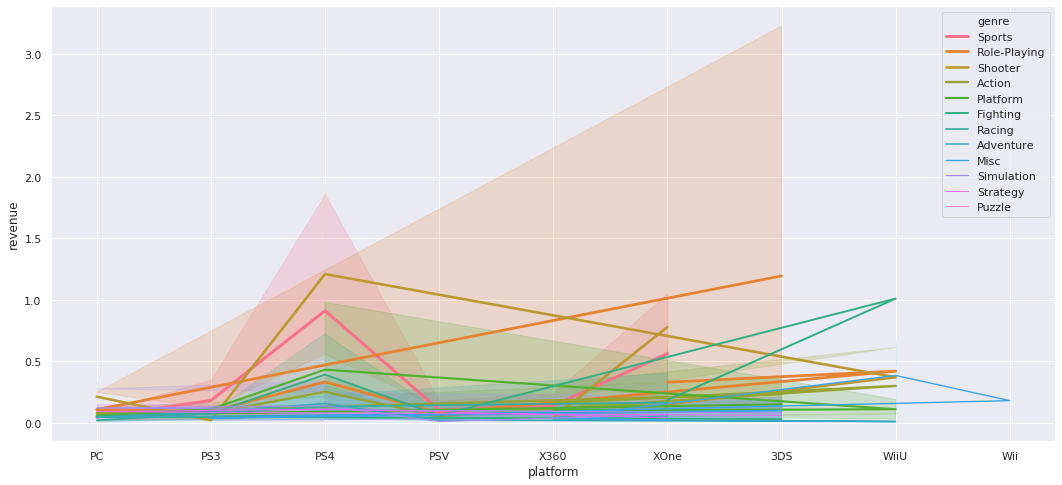

In [50]:
def fig():
    #--------------------------------------------------------------------------------------------------------
    #Выручка в разрезе жанров игр за 2016 год
    ax_1 = sns.barplot(y='revenue', x='genre', hue = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                            #&(temp_games['revenue'] > 1)\
                           ].sort_values(by='revenue', ascending=False)\
                    )
    plt.show()
    #--------------------------------------------------------------------------------------------------------
    #Выручка по платформам в разрезе четырех последних лет
    ax_2 = sns.lineplot(y='revenue', x='platform', hue='year_of_release', size = 'year_of_release'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2013, 2014, 2015, 2016]))\
                           # &(temp_games['platform'] == 'PC')\
                           ]\
                    )
    plt.show()
    #--------------------------------------------------------------------------------------------------------
    #использование жанров на платформах за 2016 год
    ax_3 = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                     ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                            #&(temp_games['platform'] == 'PC')\
                           ]\
                    )
    plt.show()
fig()

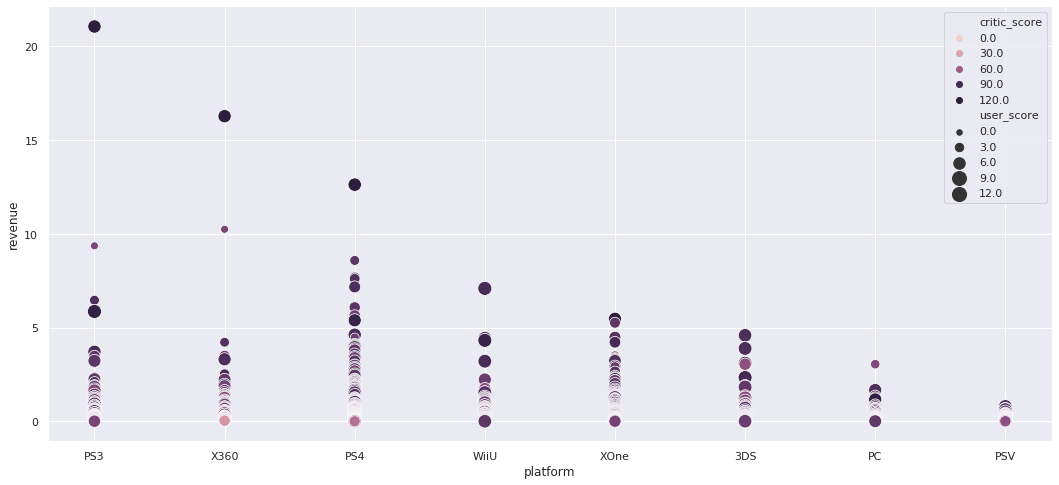

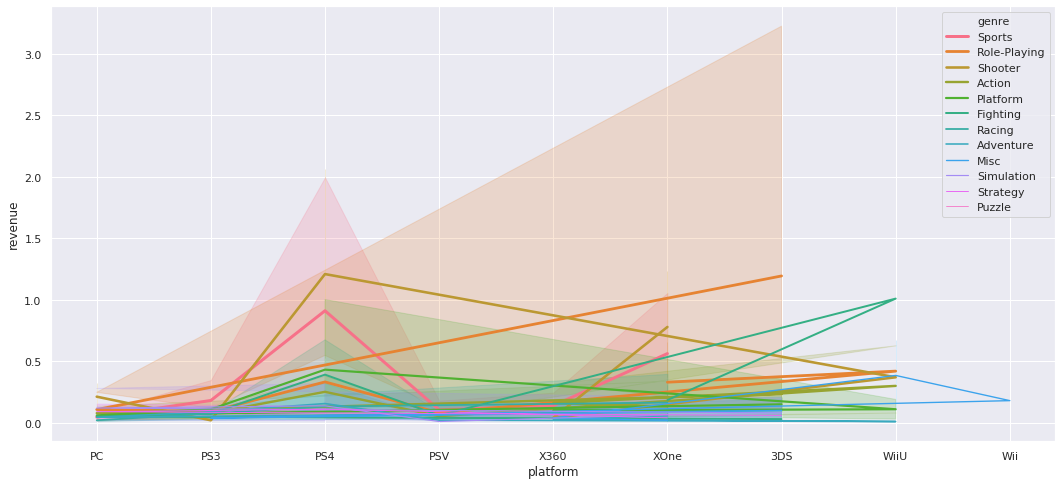

In [51]:
ax = sns.scatterplot(y='revenue', x='platform', hue='critic_score', size = 'user_score'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2012,2013,2014,2015,2016]))\
                                    &(temp_games['user_score'] > 0)\
                                    &(temp_games['critic_score'] > 0)\
                       ],\
                     sizes=(30,200)\
                )
plt.show()
ax = sns.lineplot(y='revenue', x='platform', hue='genre', size = 'genre'\
                 ,data = temp_games[(temp_games['year_of_release'].isin([2016]))\
                        #&(temp_games['platform'] == 'PC')\
                       ]\
                )
plt.show()

__Гипотеза__: жанровый портфель уменьшается в связи с нисходящим тредом выручки.

__Гипотеза__: уменьшение жанров ведёт к вымиранию платформы

##### Вывод:
1. Игровая индустрия очень быстро изменяется;
2. Тренд выручки нисходящий;
3. Топ платформы: PS4, WiiU, XOne, 3DS;
4. Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
5. Топ-низ жанры: Adventure, Puzzle
5. Средний срок жизни платформы - 7 лет.

In [52]:
#проверим, действительно ли осталсяв 2016 году у данной платформы только один жанр
temp_games[(temp_games['year_of_release'].isin([2016]))\
                        &(temp_games['platform'] == 'Wii')\
                       ]['genre']

8009    Misc
Name: genre, dtype: object

In [53]:
games_table[(games_table['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').describe()

,name
count,11.000000
mean,118.272727
std,125.647993
min,1.000000
25%,9.000000
50%,48.000000
75%,220.500000
max,325.000000


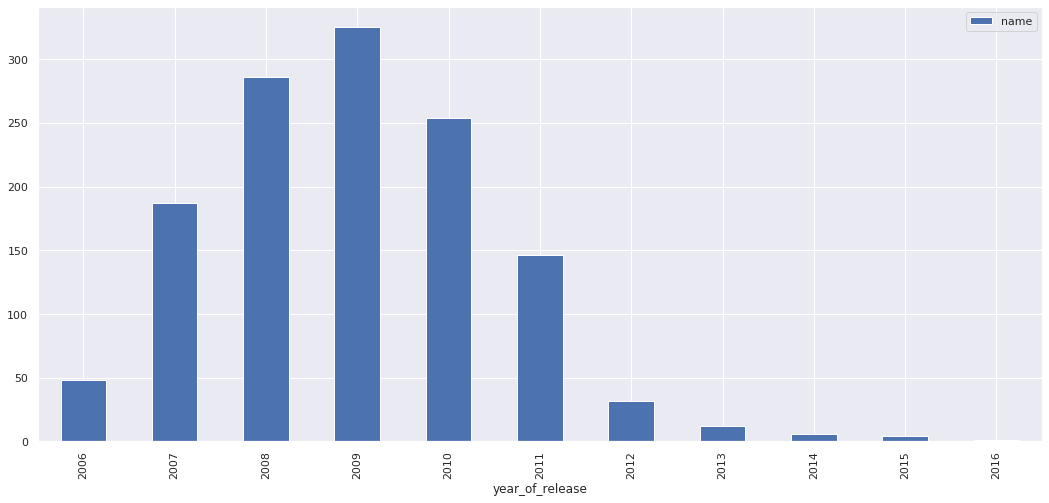

In [54]:
games_table[(games_table['platform'] == 'Wii')].pivot_table('name','year_of_release', aggfunc='count').plot(kind='bar');

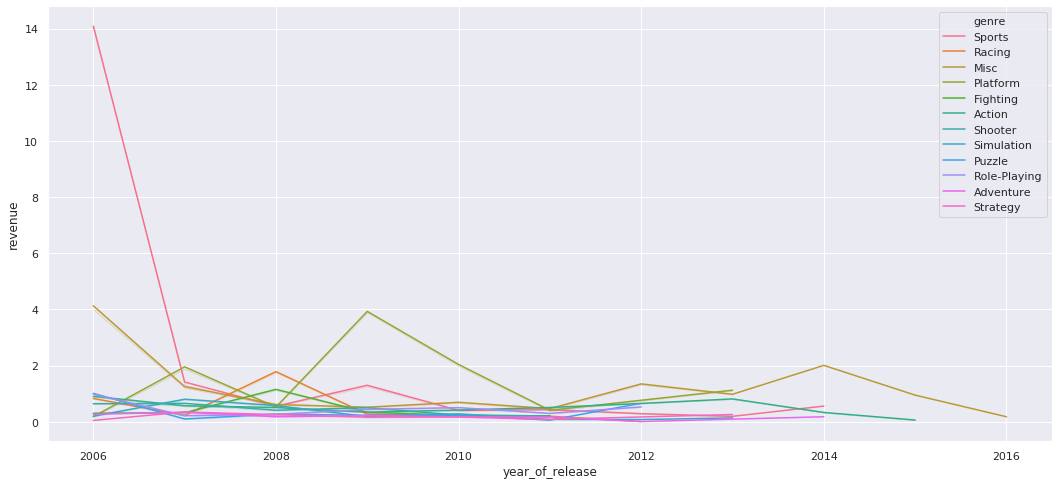

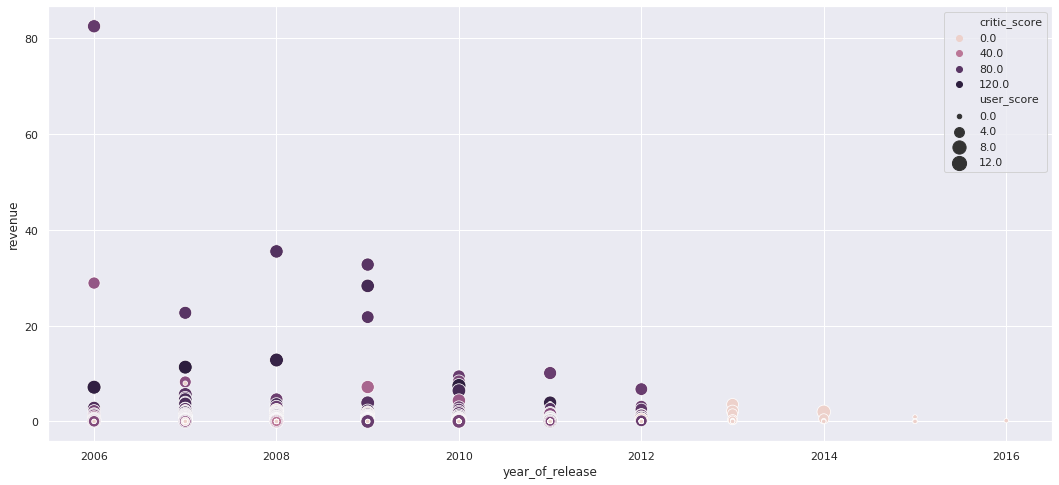

In [55]:
ax = sns.lineplot(y='revenue', x='year_of_release', hue='genre',\
                  markers=True, ci=False,\
                 data = games_table[(games_table['platform'] == 'Wii')])
plt.show()

ax = sns.scatterplot(y='revenue', x='year_of_release',hue='critic_score',size='user_score',\
                     sizes=(20,200), data = games_table[(games_table['platform'] == 'Wii')])
plt.show()

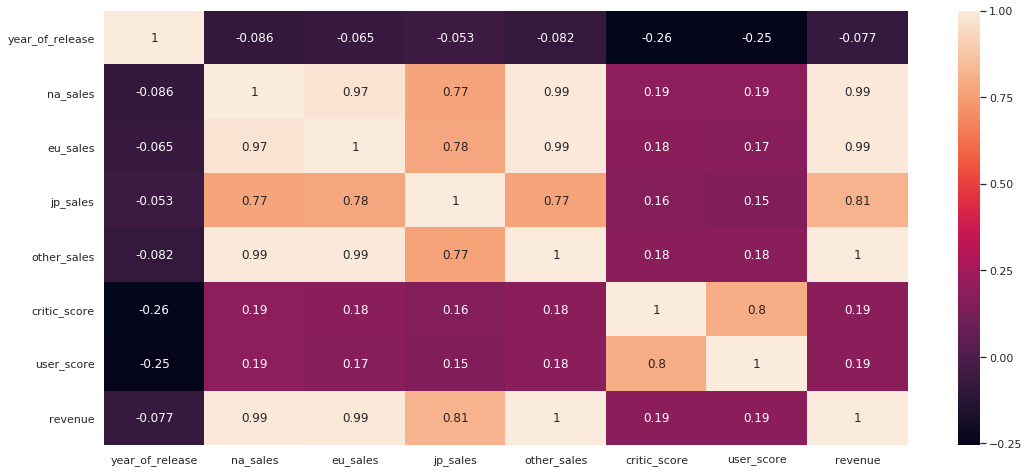

In [56]:
a = games_table[(games_table['platform'] == 'Wii')].corr()
sns.heatmap(a, annot=True);

Платформа Wii теряет ежегодно выручку и уменьшает количество игровых жанров, также компания получает всё больше негативных отзывов со стороны пользователей. Количество игр уменьшается с 325 в 2009 до 1 в 2016. После 2012 года началось доживание платформы, т.к. количество игр было симметрично этапу появления платформы. Чётко прослеживается нормальное распределение. Нет обширного потфеля жанров, платформа вымирает, разработчики перестают писать игры, т.к. выручка от игр падает. Данный анализ платформы подтверждает начальное предположение о сроуке жизни платформ, который равен 9 годам.

---


##### Рассмотрим топовые платформы и количественное распределение игр:

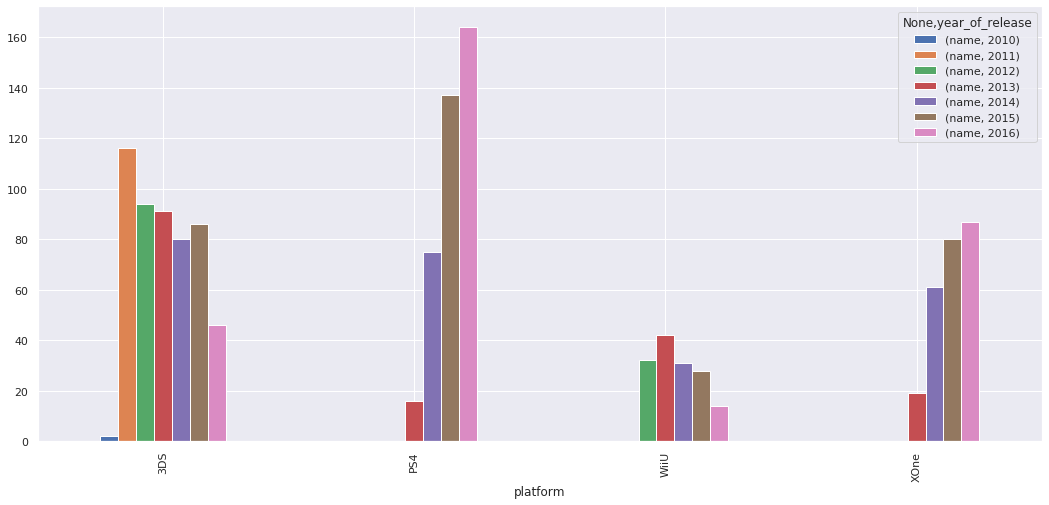

In [57]:
(games_table[(games_table['platform'].isin(['PS4', 'WiiU', 'XOne', '3DS']))]
 .pivot_table('name',['platform','year_of_release'], aggfunc='count')
 .unstack()
 .plot(kind='bar')
);

##### Вывод:
Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU

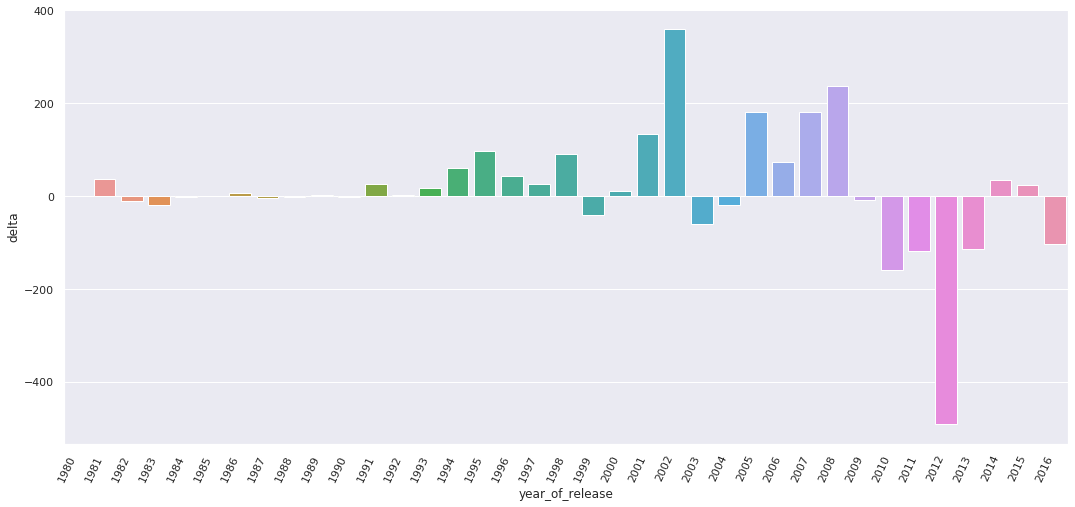

In [58]:
temp = (games_table.pivot_table('name',['year_of_release'], aggfunc='count'))

#Рассмотрим разницу между годами и добавим дельту
temp_delta = games_table.pivot_table('name',['year_of_release'], aggfunc = 'count')
b = temp_delta.T.to_dict()
temp_dict = {x: b[x]['name'] - b[x-1]['name'] for x in b if x > 1980}
temp_dict[1980] = 0
temp_delta['delta'] = temp_delta.apply(lambda x: x.index)
temp_delta['delta'] = temp_delta['delta'].apply(lambda x: temp_dict[x])

sns.barplot(x=temp_delta.index, y = 'delta', data = temp_delta);
plt.xticks(rotation=65, horizontalalignment='right');

In [59]:
print('среднее - ',int(temp.loc[2012:2016].mean()))
print('стандарное отклонение - ',int(temp.loc[2012:2016].std()))

среднее -  579
стандарное отклонение -  60


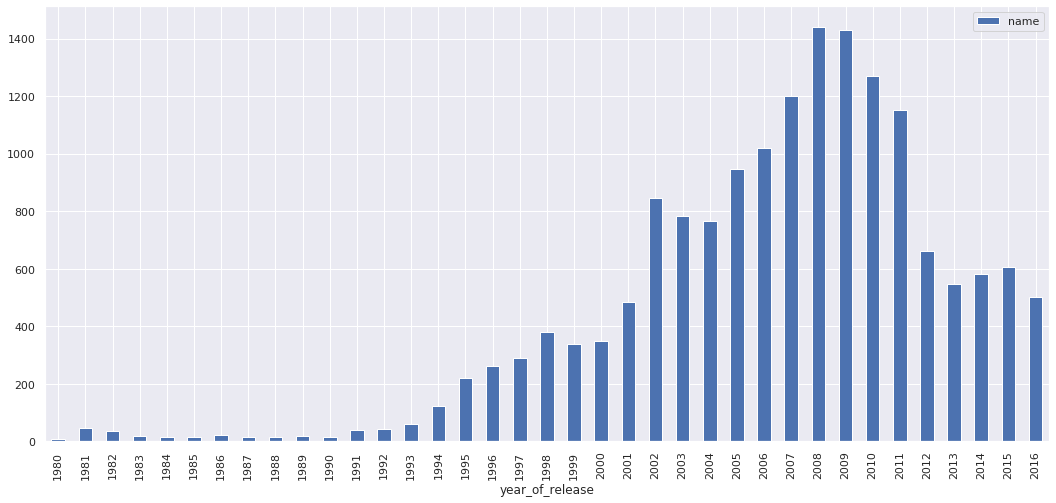

In [60]:
(games_table
 .pivot_table('name',['year_of_release'], aggfunc='count')
 .plot(kind='bar')
);

##### Вывод:
Тренд, который начался в 2001 года обрушился в 2012 году и суммарное количество игр уменьшилось резко в два раза. Новый тренд начал устанавливаться в 2013 году и он нисходящий. Вероятнее всего, производители игр выбрали новый путь, т.е. от количественного показателя перешли к качественному игр.

___Моё мнение на данный счёт:___ Игровая индустрия усложняется, технические характеристики растут игр растут, ресурсные потребности растут, цена игр растёт, количество платформ уменьшается.

---
## Комментарий от наставника

Интересное мнение. Возможно, оно так и есть.  

---

##### График «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах

In [61]:
games_table_2016_topgame = (games_table
                    .query('year_of_release == 2016')
                    .sort_values(by='revenue', ascending=False)
                    .reset_index(drop=True)
                    .head(15)
                   )
name_game = set(games_table_2016_topgame['name'].values)


games_table_2016 = (games_table
                    .query('(year_of_release == 2016) and (name.isin(@name_game))')
                    .sort_values(by='revenue', ascending=False)
                    .reset_index(drop=True)
                   )



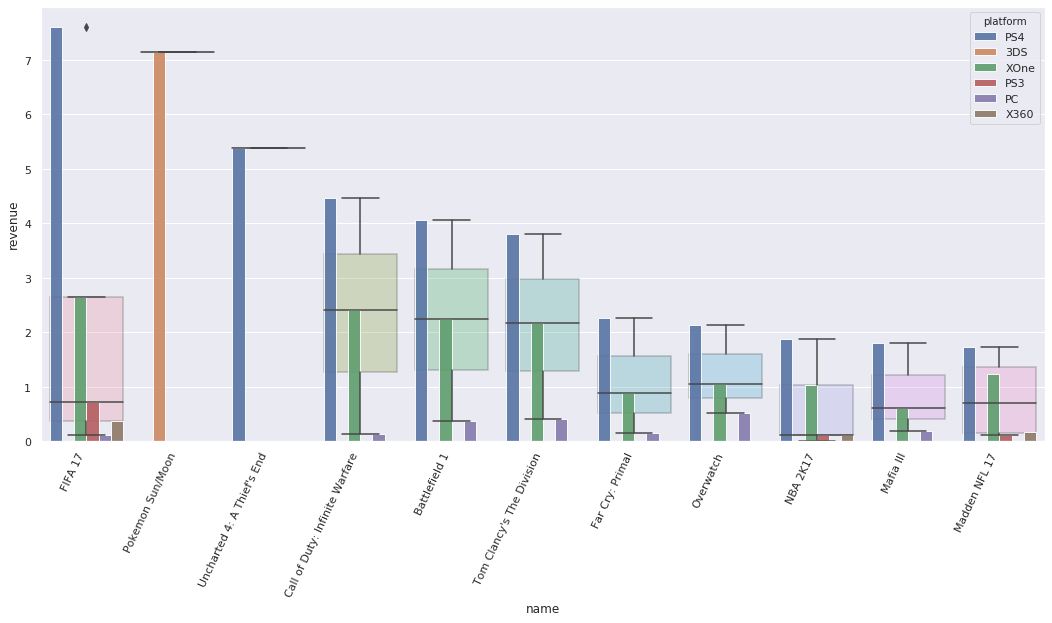

In [62]:
ax = sns.boxplot(x='name'\
                 ,y='revenue'\
                 #,hue = 'platform'\
                 ,data=games_table_2016\
                 ,boxprops=dict(alpha=.3)
                )
plt.xticks(rotation=65, horizontalalignment='right');
ax = sns.barplot(x='name',y='revenue', hue = 'platform', data=games_table_2016, alpha=.9)
#ax.set_xticklabels(ax.get_xticklabels(),rotation=30, rotation_mode="left");

##### Вывод:
Топ3 игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, т.к. от ПК никто отказываться не планирует, т.к. он связан со множеством других функций.

##### Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами.

Оценки критиков и пользовательские коррелируют,т.е. есть сильная зависимость, поэтому сделаем общий столбец в котором отобразим усредненную оценку

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


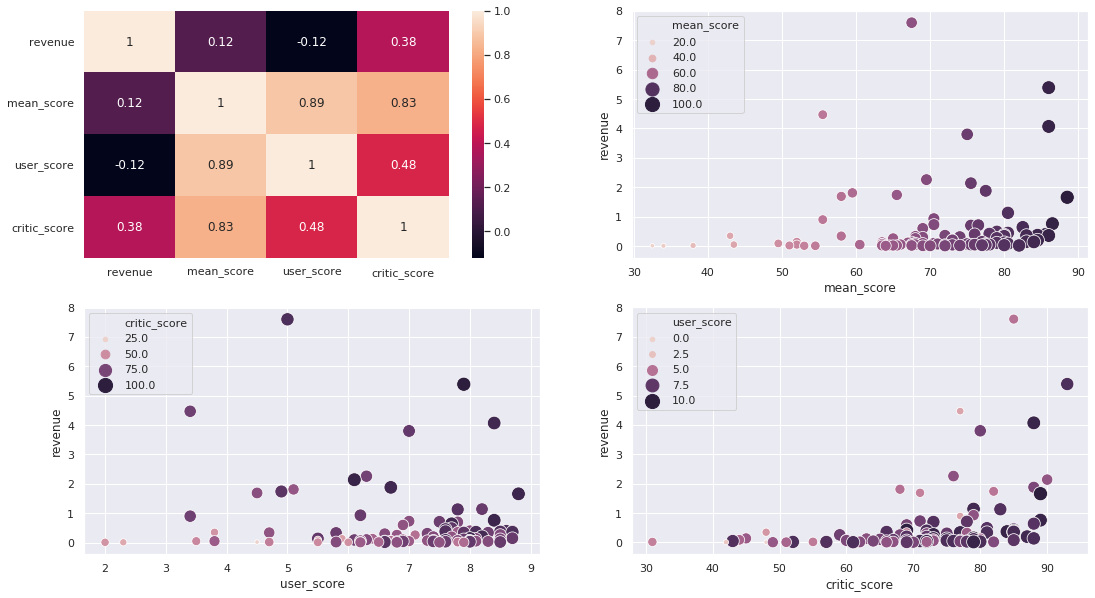

In [63]:
def func(row):
    user = row['user_score']*10
    critic = row['critic_score']
    if user==0:
        return critic
    elif critic==0:
        return user
    else:
        return (user+critic)/2
    
def temp_func(platformi):
    games_table['mean_score'] = games_table.apply(func,axis=1)

    temp = games_table.query('year_of_release == 2016\
                                and platform ==@platformi\
                                and user_score > 0\
                                and critic_score > 0').reset_index(drop=True)


    fig, axis = plt.subplots(2,2, figsize=(18,10))
    sns.heatmap(temp.loc[:,['revenue', 'mean_score', 'user_score', 'critic_score']].corr(),annot=True,ax=axis[0,0]);      
    sns.scatterplot(x='mean_score',y='revenue',hue = 'mean_score',size = 'mean_score',sizes = (20,200),data=temp,ax=axis[0,1]);
    sns.scatterplot(x='user_score',y='revenue',hue = 'critic_score',size = 'critic_score',sizes = (20,200), data=temp,ax=axis[1,0] );
    sns.scatterplot(x='critic_score',y='revenue',hue = 'user_score',size = 'user_score',sizes = (20,200), data=temp,ax=axis[1,1]);
temp_func('PS4')

Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


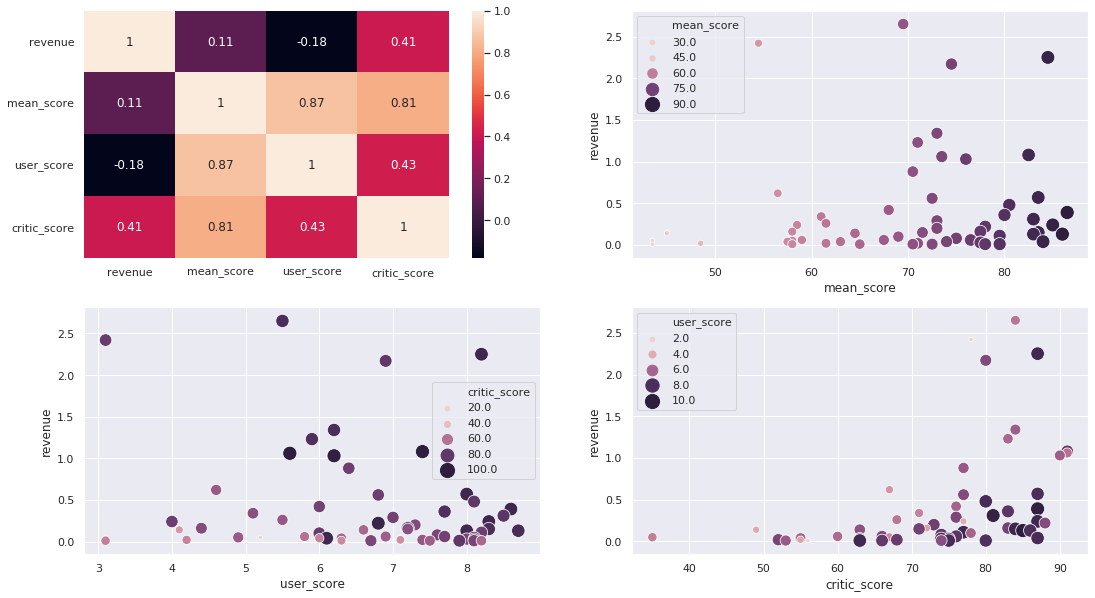

In [64]:
temp_func('XOne')

Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


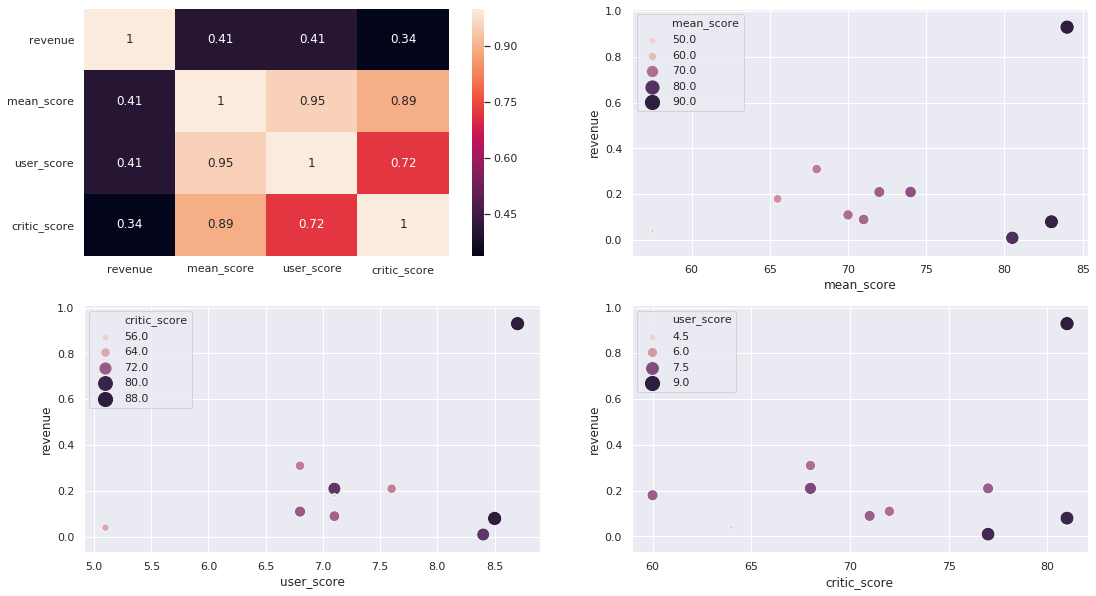

In [65]:
temp_func('3DS')

Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.

##### Вывод:
Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.

##### Итог корреляционного анализа для топ3 платформ:

* Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
* Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
* Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.

Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа.

---
## Комментарий от наставника

Стоит оценить влияние оценок критиков и пользователей по отдельности. При этом не стоит учитывать индикаторные значения в анализе, это нереальные данные, которыми мы заполнили пропуски. Также стоит рассмотреть несколько платформ. Возможно, результаты будут разниться. 
> Провёл, результаты разнятся только по платформе 3DS, основными потребителями которой является японский регион.

---

<font color=blue> Хорошая визуализация, показывающая все необходимые характеристики. 
    
---


## Вывод:
*Не учитывайте в работе данные за предыдущие годы.*

---
##### ответ - вопрос:

1. Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?
    * *До 1994 года выпускалось не более 50 игр в год для разных платформ, а с 1994 года начался рост количества игр для платформ, где согласно тренду за пять лет происходит удвоение количества, но 2008 год стал экстемумом и было выпущено 1430 игр,а после 2009 года началось падение количественного показателя и в 2012 году - в 2 раза по сравнению с 2011, и зафиксировался снижающийся тренд и среднее количество игр выпускоемое в год - 579 +/-60*
2. Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?
    * *Средний срок жизни платформы - 7 лет*
3. Возьмите данные за соответствующий актуальный период. Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
    * *Предварительный - да, но не зватает дополнительных данных активность игроков на платформе.*  
4. Какие платформы лидируют по продажам, растут или падают? Выберите несколько потенциально прибыльных платформ.
    * *Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU*
5. Постройте график «ящик с усами» по глобальным продажам каждой игры и разбивкой по платформам. Велика ли разница в продажах? А в средних продажах на разных платформах? Опишите результат.
    * Топ3 игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, т.к. от ПК никто отказываться не планирует, т.к. он связан со множеством других функций.
6. Посмотрите, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.
    * Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.
    * Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
    * Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
    * Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.
    * Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа.
    
    
    
7. Соотнесите выводы с продажами игр на других платформах.
    * Игровая индустрия очень быстро изменяется;
    * Тренд выручки нисходящий;
    * Топ платформы: PS4, WiiU, XOne, 3DS;
    
8. Посмотрите на общее распределение игр по жанрам. Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?
    * Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов.
    * Топ-низ жанры: Adventure, Puzzle

---
## Комментарий от наставника

Правильный вывод пожанрам, но не стоит забывать, что производство игр в жанрах Action или Shooter обходится сильно дороже, чем производство Puzzle-игр. 
> Полностью согласен

---

## Портрет пользователя каждого региона (шаг 4)
___Определить для пользователя каждого региона (NA, EU, JP):___
1. Самые популярные платформы (топ-5). Опишите различия в долях продаж.
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

In [66]:
games_table.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54,78.0
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24,0.0
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52,82.5
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77,80.0
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38,0.0


Рассмотри только 2016 год

In [67]:
games_table_2016 = games_table.query('year_of_release == 2016')

In [68]:
stat_games_table_2016 = games_table_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['platform'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

def func(row):
      
    row.eu_sales = round(row.eu_sales/row.revenue,2)
    row.jp_sales = round(row.jp_sales/row.revenue,2)
    row.na_sales = round(row.na_sales/row.revenue,2)
    row.other_sales = round(row.other_sales/row.revenue,2)
    return row
    
stat_games_table_2016_delta = stat_games_table_2016.copy()
stat_games_table_2016_delta = stat_games_table_2016_delta.apply(func, axis=1)
stat_games_table_2016_delta

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,0.46,0.08,0.31,0.15,69.25
XOne,0.37,0.00,0.55,0.09,26.15
3DS,0.15,0.53,0.27,0.04,15.14
WiiU,0.32,0.15,0.46,0.08,4.60
PC,0.67,0.00,0.26,0.07,5.25
X360,0.47,0.00,0.45,0.08,1.52
PS3,0.35,0.36,0.19,0.10,3.60
PSV,0.09,0.84,0.04,0.04,4.25
Wii,0.61,0.00,0.33,0.06,0.18


In [69]:
stat_games_table_2016

,eu_sales,jp_sales,na_sales,other_sales,revenue
platform,,,,,
PS4,31.78,5.74,21.49,10.24,69.25
XOne,9.63,0.01,14.27,2.24,26.15
3DS,2.33,8.03,4.14,0.64,15.14
WiiU,1.48,0.67,2.10,0.35,4.60
PC,3.53,0.00,1.36,0.36,5.25
X360,0.71,0.00,0.69,0.12,1.52
PS3,1.26,1.30,0.67,0.37,3.60
PSV,0.39,3.56,0.15,0.15,4.25
Wii,0.11,0.00,0.06,0.01,0.18


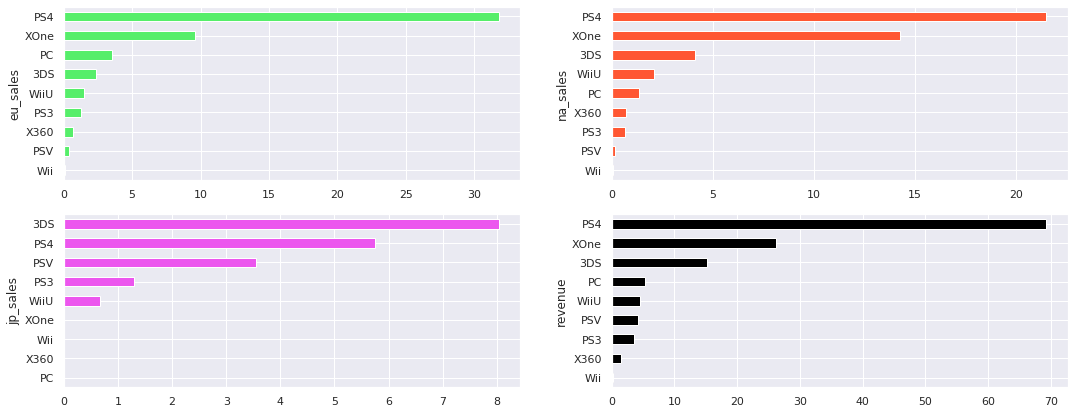

In [70]:
fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_games_table_2016['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
stat_games_table_2016['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
stat_games_table_2016['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
stat_games_table_2016['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='revenue');

#.set(title = '', xlabel = 'Показатели', ylabel = 'Числовые значения')

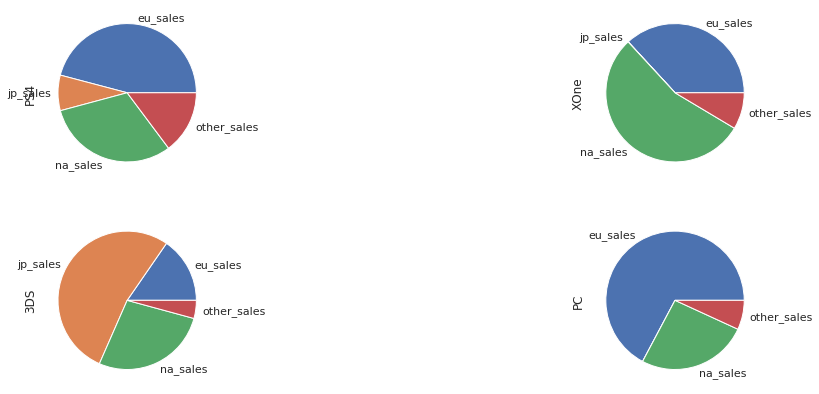

In [71]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
stat_games_table_2016.loc['PS4',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_games_table_2016.loc['XOne',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_games_table_2016.loc['3DS',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_games_table_2016.loc['PC',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);
#stat_games_table_2016.loc['Fighting',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie();

#### Вывод:
##### 1. Самые популярные платформы (топ-5)
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
2. Самые популярные жанры (топ-5). Поясните разницу.
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

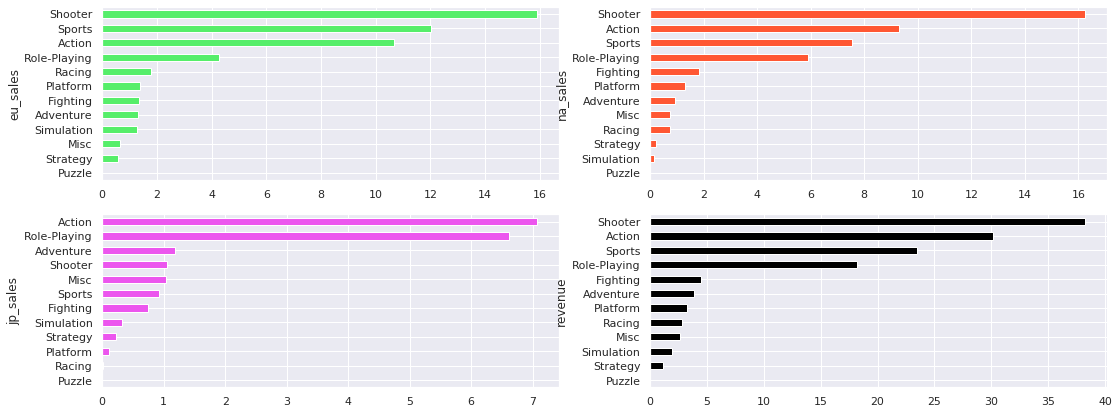

In [72]:
stat_games_table_2016_g = games_table_2016\
            .pivot_table(['na_sales','eu_sales','jp_sales','other_sales','revenue'], ['genre'], aggfunc='sum')\
            .sort_values(by='na_sales', ascending=False)

fig, axis = plt.subplots(2,2, figsize=(18,7))

stat_games_table_2016_g['eu_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,0], color = '#56EE6A').set(ylabel='eu_sales');
stat_games_table_2016_g['na_sales'].sort_values(ascending=True).plot.barh(ax=axis[0,1], color = '#FF5733').set(ylabel='na_sales');
stat_games_table_2016_g['jp_sales'].sort_values(ascending=True).plot.barh(ax=axis[1,0], color = '#EC56EE').set(ylabel='jp_sales');
stat_games_table_2016_g['revenue'].sort_values(ascending=True).plot.barh(ax=axis[1,1], color = 'black').set(ylabel='revenue');


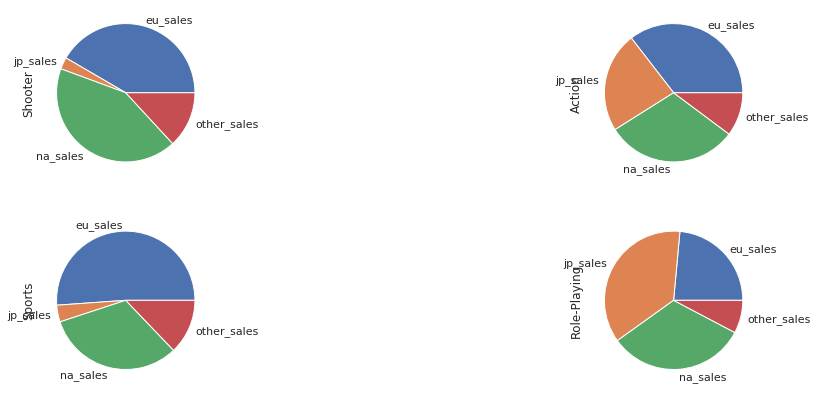

In [73]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
stat_games_table_2016_g.loc['Shooter',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,0]);
stat_games_table_2016_g.loc['Action',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[0,1]);
stat_games_table_2016_g.loc['Sports',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,0]);
stat_games_table_2016_g.loc['Role-Playing',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie(ax=axis[1,1]);
#stat_games_table_2016.loc['Fighting',['eu_sales','jp_sales','na_sales','other_sales']].plot.pie();

#### Вывод:
1. Самые популярные платформы (топ-5).
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    
    
2. __Самые популярные жанры (топ-5)__
    1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
    2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
    3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША
3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?

#### Влияние рейтинга ESRB на продажи в отдельном регионе

In [74]:
games_table_2016.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue,mean_score
94,FIFA 17,PS4,2016,Sports,0.66,5.75,0.08,1.11,85.0,5.0,E,7.60,67.5
108,Pokemon Sun/Moon,3DS,2016,Role-Playing,2.98,1.45,2.26,0.45,0.0,0.0,tbd,7.14,0.0
171,Uncharted 4: A Thief's End,PS4,2016,Shooter,1.85,2.50,0.19,0.85,93.0,7.9,T,5.39,86.0
245,Call of Duty: Infinite Warfare,PS4,2016,Shooter,1.61,2.00,0.15,0.71,77.0,3.4,M,4.47,55.5
289,Battlefield 1,PS4,2016,Shooter,1.10,2.15,0.21,0.61,88.0,8.4,M,4.07,86.0


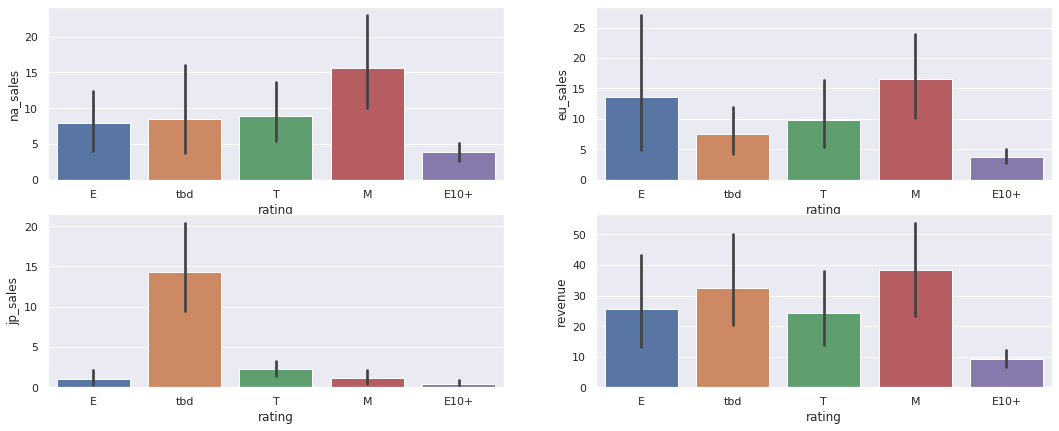

In [75]:
fig, axis = plt.subplots(2,2, figsize=(18,7))
sns.barplot(y='na_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[0,0]);
sns.barplot(y='eu_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[0,1]);
sns.barplot(y='jp_sales', x='rating', data = games_table_2016,estimator=sum, ax=axis[1,0]);
sns.barplot(y='revenue', x='rating', data = games_table_2016,estimator=sum, ax=axis[1,1]);

#### Вывод:
1. Самые популярные платформы (топ-5).
    1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
    2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
    3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    
    
2. Самые популярные жанры (топ-5)
    1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
    2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
    3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША
3. __Влияет ли рейтинг ESRB на продажи в отдельном регионе?__
    1. Да, влияние есть, и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

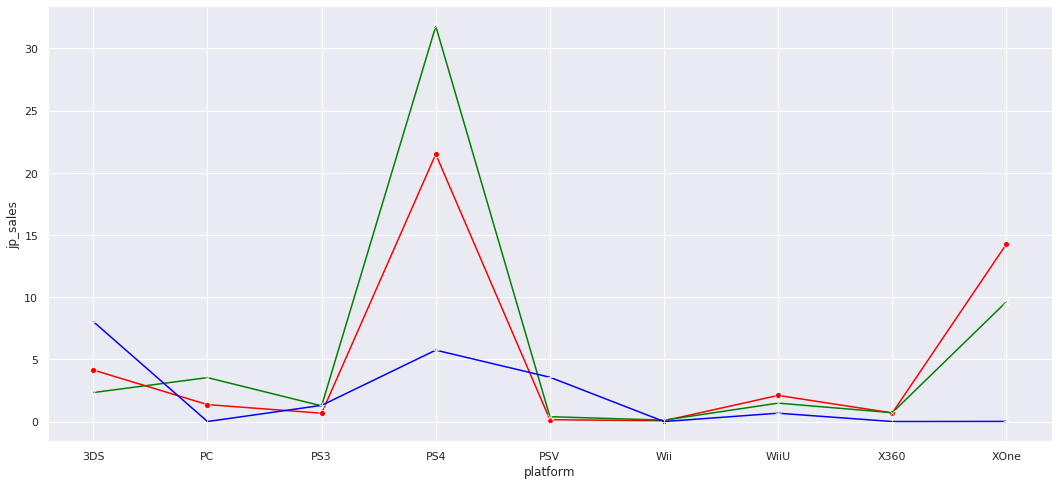

In [76]:
sns.lineplot(x=stat_games_table_2016.index, y='na_sales', data=stat_games_table_2016, color = 'red', marker='o');
sns.lineplot(x=stat_games_table_2016.index, y='eu_sales', data=stat_games_table_2016, color = 'green', marker='x');
sns.lineplot(x=stat_games_table_2016.index, y='jp_sales', data=stat_games_table_2016, color = 'blue', marker='+');
#sns.barplot(x=stat_games_table_2016.index, y='revenue', data=stat_games_table_2016, color = 'blue')


### Общий вывод:
Пользователи Европы и Штатов любят "шутеры", что соответствует платформе PS4 и XOne, но американские пользователи предпочитают "экшен" жанр - спортивномe, в топе у европейцев входят "гонки", а у представителей штатов "файтинги". Портрет японского игрока полностью отличается, т.к. главный игровой жанр - "экшен", а основная консоль - 3DS. По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

---
## Комментарий от наставника

Портрет типичного пользователя каждого из регионов получен. Приведены все необходимые графики. Здорово, что отмечены индивидуальные особенности каждого региона. 

---

## Проверьте гипотезы (Шаг 5.) 
1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
2. Средние пользовательские рейтинги жанров Action (англ. «действие») и Sports (англ. «виды спорта») разные.

*Комментарий:*
* *Задайте самостоятельно пороговое значение alpha.*
* *Поясните: Как вы сформулировали нулевую и альтернативную гипотезы;*
* *Поясните: Какой критерий применили для проверки гипотез и почему.*

In [77]:
backup

,версия,необходимость,название,комментарий
0,v0,исходный файл,games_table_v0,выгрузка
1,v1,смена типа(int32) и заполнение(nan на 0),games_table_v1,модификация - year_of_release
2,v2,"удалены пропуски, дубли",games_table_v2,"0 в рейтинге - не оценен, дабавлен revenue"
3,v3,восстановлены года,games_table_v3,файл готов к анализу


In [78]:
games_table_v3.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,revenue
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,0.0,0.0,tbd,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,0.0,0.0,tbd,31.38


### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
Данная гипотеза будет о равенстве будет HO, соответственно не отвержение данной гипотезы будет означать равенство есть, а в случае отвержения, мы автоматически принимаем альтернативную о неравенстве. Год исследования - 2016.


In [79]:
xone = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&\
                           (games_table_v3['platform'] == 'XOne')&(games_table_v3['user_score'] != 0)]['user_score'])
pc = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&\
                         (games_table_v3['platform'] == 'PC')&(games_table_v3['user_score'] != 0)]['user_score'])

alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    xone, 
    pc,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, рейтинги платформ Xbox One и PC разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые")

p-значение: 0.33982
Не получилось отвергнуть нулевую гипотезу, рейтинги платформ Xbox One и PC одинаковые


При проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период - 2016 год, то ситуация изменилась и нулевая гипотеза не отвергнута. 

---
## Комментарий от наставника

Гипотезы проверены верно. Их формулировку стоит прописать перед проведением статистического теста. 

---

### Средние пользовательские рейтинги жанров Action и Sports разные

In [80]:
action = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&(games_table_v3['genre'] == 'Action')]['user_score'])
sports = list(games_table_v3[(games_table_v3['year_of_release'] > 2015)&(games_table_v3['genre'] == 'Sports')]['user_score'])


alpha = .05 # критический уровень статистической значимости
            # если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    action, 
    sports,
    equal_var = True)

print('p-значение: {:.5f}'.format(results.pvalue))

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports разные")
else:
    print("Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные")

p-значение: 0.06453
Не получилось отвергнуть нулевую гипотезу, средние пользовательские рейтинги жанров Action и Sports равные


При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отвергалась, НО когда был выбран актуальный период, то ситуация изменилась и нулевая гипотеза не отвергнута, что означет, что альтернативная гипотеза отвергнута и средние рейтинги равны со статистической значимостью 0.05.

## Итоговый вывод:

1. Первичный анализ выполнен, обнаружены проблемы с типами данных в столбцах: year_of_release, users_scores и разнорегистрововые наименования, для корректной работы требуется привести столбцы к int32, float32 - типам, а наименования трансформировать в нижний регистр. В data sets имеются пропуски, как данные собирались из открытых источников не понятно и есть предположения, что в открытых ресурсах либо присутствовали не все данные и при попытке автоматичесго сбора поля заполнились пустыми значениями, второй вариант сбощик не смог считать нужный признак. Пропуск в наименовании игры может означать невозвожность кодирования на латиницу исходного наименования, либо некоректная отработка сборщика. Отсутствие пользовательских отзывов и критиков: всё вышесказанное, плюс их могло просто не быть, такое характерно для игр прошлого. Отсутствие рейтинга или tbd означает не более чем, что издатель не захотел получать рейтинговую оценку ESRB или игра не планировалась выпускаться для региона NA. 


2. Подготовка данных к анализу выполнена:
    1. Строки с пропуском имени были удаленны, так же как и строки с пропуском жанра.
    2. Пропуски в столбце rating были замененны на tbd, что означает что рейтинга нет или он ожидается
    3. Пропуски в столбцах critic_score и user_score были заменены на нулевые, что означает, что нет оценки. Сделать замену на медианное или какое-либо иное значение на текущем этапе нельзя, т.к. будет смещение в данных.
    4. Суммарные продажи посчитаны.
    
    
3. Исследовательский анализ выполнен:
    1. До 1994 года выпускалось не более 50 игр в год для разных платформ, а с 1994 года начался рост количества игр для платформ, где согласно тренду за пять лет происходит удвоение количества, но 2008 год стал экстемумом и было выпущено 1430 игр,а после 2009 года началось падение количественного показателя и в 2012 году - в 2 раза по сравнению с 2011, и зафиксировался снижающийся тренд и среднее количество игр выпускоемое в год - 579 +/-60.
    2. Средний срок жизни платформы - 7 лет
    3. Предварительный - да, но не зватает дополнительных данных активность игроков на платформе.
    4. Количество игр растёт на платформах PS4 и XOne, в отличии от 3DS и WiiU
    5. Топ3 игр: Fifa 17, Pokemon Sun/Moon, Uncharted 4 - из графика видно, что это топовые игры с самыми высокими показателями выручки, соответственно вывод о том, что топовыми платформами являются PS4, 3DS, XOne. PC - это платформа долгожитель, но это вполне логично, т.к. от ПК никто отказываться не планирует, т.к. он связан со множеством других функций.
    6. Корреляционная зависимость между отзывами пользователей,критиков и продажами есть, но слабо выраженая. Например, у самой кассовой игры 2016 года - fifa 17, далеко не самый высокий показатель. Есть игры, отзывы которых высокие, но продажи среднии. Тут с моей точки зрения нужны более свежии данные с более высоким уровнем качества.
        * Для платформы PS4 корреляция между продажами и пользовательскими отзывами: -0,12 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,38 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
        * Для платформы XOne корреляция между продажами и пользовательскими отзывами: -0,18 - слабая, отрицательная, в тоже время оценки критиков коррелируют:0,41 - средняя зависимость, положительная, а усреднённые отзывы коррелируют слабо за счёт разности коррекляций для данной платформы.
        * Для платформы 3DS корреляция между продажами и пользовательскими отзывами: 0.41 - средняя, положительная, в тоже время оценки критиков коррелируют:0,34 - средняя зависимость, положительная, а усреднённые отзывы коррелируют средне за счёт смещения в пользовательскую сторону для данной платформы.
        * Таким образом, пользовательские отзывы в большей части слабо коррелируют и в отрицателдьную сторону, что не совпадает с отзывами критиков, т.к. тут зависимость есть от 0.34-0.41 средневыраженая. Средний показатель отзывов не позволяет выявить корреляцию между отзывами и продажами, т.к. он постояно смещается. Соответственно, критики более точно прогнозируют успех игры, в отличии от пользователей. Конечно, вывод немного странный, но тут нужно с моей точки зрения проведение дополнительного анализа. Правда, отличается сильно по всем коэффициентам корреляции платформа 3DS, где отзывов критиков меньше, а пользователи оцинивают на порядок лучше, чем пользователи платформ PS4 и XOne.
    7. Игровая индустрия очень быстро изменяется:тренд выручки нисходящий; топ платформы: PS4, WiiU, XOne, 3DS. (по усреднённой сумарной выручке);
    8. Топовые жанры: Shooters, Sports, Role-playing - 2016 и 2015 годов; Топ-низ жанры: Adventure, Puzzle. (по усреднённой сумарной выручке)
    
    
4. Портреты пользователей составлены (*по суммарным показателям выручки*):
    1. Самые популярные платформы (топ-5).
        1. EU: PS4, XOne, PC, 3DS, WiiU - Европа
        2. JP: 3DS, PS4, PSV, PS3, WiiU - Япония
        3. NA: PS4, XOne, 3DS, WiiU, PC - CША
    2. Самые популярные жанры (топ-5)
        1. EU: Shooter, Sports, Action, Role-Playing, Racing - Европа
        2. JP: Action, Role-Playing, Adventure, Shooter, Misc - Япония
        3. NA: Shooter, Action, Sports, Role-Playing, Fighting - CША
    3. Влияет ли рейтинг ESRB на продажи в отдельном регионе?
        1. Да, влияние есть, и это проявляется на графике, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.

    Пользователи Европы и Штатов любят "шутеры", что соответствует платформе PS4 и XOne, но американские пользователи предпочитают "экшен" жанр - спортивномe, в топе у европейцев входят "гонки", а у представителей штатов "файтинги". Портрет японского игрока полностью отличается, т.к. главный игровой жанр - "экшен", а основная консоль - 3DS. По большей части игровые жанры для определённого региона соответствуют менталитету и культуре стран, консоли же подбираются исходя из основных жанров. Правда некоторые платформы имеют множество жанров, что позволяет покрыть потребности разных регионов. Рейтинг ESRB влияет на европейских и американских игроков, кроме региона - Япония, здесь сумарные продажи у игр без рейтинга выше.


5. Проверка гипотез
    1. Первая гипотеза: HO - подтвердилась, H1 - отвергнута. Что подтвердило статистическую гипотезу о равенстве пользовательских рейтингов, т.к. базировалась она на нулевой. При проведении статистического теста по всему периоду, получилось, что рейтинги платформ разные и нулевая гипотеза отвергалась, но когда был выбран актуальный период - 2016 год, то ситуация изменилась и нулевая гипотеза не отвергнута. 
    2. Вторая гипотеза: HO - принята, H1 - отвергнута. При проведении статистического теста по всему периоду, получилось, что рейтинги жанров action и sports разные и нулевая гипотеза отвергалась, НО когда был выбран актуальный период, то ситуация изменилась и нулевая гипотеза не отвергнута, что означет, что альтернативная гипотеза отвергнута и средние рейтинги равны со статистической значимостью 0.05.


---
## Комментарий от наставника

Выводы описаны грамотно. Приведены ответы на главные вопросы проекта. В выводах можно приводить полученные ранее значения, правильно. Здорово, что по каждому пункту работы приведен вывод. 

---

<font color=blue> Помарки исправлены, и теперь работа выполнена хорошо. Успехов в дальнейших проектах :)
    
---

## Комментарий от наставника

Если тебе нравится тема визуализации, то можешь изучить методы библиотеки plotly. Она позволяет строить интерактивные графики.

Ты проделал большую работу, молодец! Работа выполнена хорошо, осталось еще немного. Доделай корреляционный анализ на примере нескольких платформ. Также выбери актуальный год и проверь гипотезы на данных, начиная с выбранного года. Посмотри, изменится ли результат. Если да, то почему так происходит. Жду твою работу :)

-----